# i. Introduction

--------------------------------------------------------------------
**FINAL PROJECT**

**Nama Anggota**  :  
1. Achmad Raihan  
2. Handwitanto Abraham
3. Serina Roihaanah Mulawati
4. Stanly Sukmajaya Kwok

**Batch : RMT-036**
**GROUP 2** 

Program ini dibuat untuk mengetahui bagaimana sentimen masyarakat terhadap produk _Smartphone_ yang sudah ada dan akan segera rilis.

--------------------------------------------------------------------


# ii. Problem Background

### ii. a. Prologue

Program ini dibuat untuk membantu masyarakat dalam memilih smartphone dengan memanfaatkan analisis sentimen netizen di platform YouTube. Aplikasi ini dirancang untuk menganalisis sentimen komentar menggunakan teknik NLP (Natural Language Processing) berbasis Machine Learning atau Deep Learning.

Proses dimulai dengan pengumpulan data melalui scraping komentar pada video YouTube yang relevan dengan produk smartphone tertentu. Data tersebut akan dianalisis untuk mengidentifikasi sentimen positif, negatif, atau netral. Hasil analisis ini, beserta visualisasi berupa word cloud, akan memberikan informasi yang berguna bagi pengguna untuk memahami opini publik terhadap produk tersebut.

Aplikasi ini bertujuan untuk memberikan rekomendasi berbasis data yang membantu masyarakat dalam pengambilan keputusan pembelian smartphone. Selain itu, aplikasi ini juga memberikan wawasan tambahan dari analisis eksploratif (EDA) yang dapat digunakan untuk memahami tren opini publik secara lebih luas. Dengan pendekatan ini, diharapkan pengguna dapat mengambil keputusan yang lebih informatif, efisien, dan tepat sasaran.

### ii. b. Business Understanding

Untuk mengidentifikasi kasus yang dimiliki, maka dirancang **SMART Framework** dengan rincian sebagai berikut:

- **SPECIFIC**:  
  Berfokus pada pembuatan aplikasi untuk memudahkan masyarakat dalam memilih smartphone berdasarkan analisis sentimen netizen terhadap produk di platform YouTube.

- **MEASURABLE**:  
  Aplikasi harus mampu menganalisis sentimen dengan akurasi minimal 80% berdasarkan dataset pengujian.

- **ACHIEVABLE**:  
  Data akan diambil melalui scraping komentar pada video YouTube, kemudian diproses untuk menghasilkan analisis sentimen (positif, negatif, netral). Aplikasi juga akan menampilkan visualisasi berupa word cloud dari komentar yang dianalisis.  

- **RELEVANT**:  
  Dengan menyediakan informasi sentimen netizen, aplikasi ini akan membantu masyarakat dalam pengambilan keputusan yang lebih tepat saat membeli smartphone. Hal ini dapat meningkatkan kepercayaan pengguna terhadap produk tertentu dan menghemat waktu mereka dalam menentukan keputusan untuk membeli smartphone.  

- **TIME-BOUND**:  
  Proyek ini akan selesai dalam waktu satu minggu, termasuk pengumpulan data, pengolahan data, pengembangan model, pengujian, dan implementasi aplikasi.  

**PROBLEM STATEMENT**  
Target yang ingin dicapai adalah memberikan kemudahan bagi masyarakat dalam memilih smartphone dengan memanfaatkan opini dan sentimen netizen di YouTube. Aplikasi ini akan mengidentifikasi sentimen positif, negatif, dan netral pada komentar terkait, sehingga pengguna dapat memperoleh gambaran umum tentang pendapat publik terhadap produk tertentu.

**Objective:**  
Proyek ini bertujuan untuk:  
1. Mengembangkan aplikasi yang dapat menganalisis sentimen komentar pada video YouTube menggunakan model Machine Learning/Deep Learning berbasis NLP.  
2. Mempermudah pengguna dalam memahami opini publik dengan menampilkan hasil analisis berupa sentimen utama dan word cloud.  
3. Memberikan rekomendasi yang informatif dan berbasis data untuk membantu pengambilan keputusan pembelian smartphone.

### ii. c. Breaking Down the Problem

**Masalah utama:** `Menganalisis sentimen netizen untuk membantu masyarakat dalam memilih smartphone berdasarkan opini publik di YouTube`  

Untuk memudahkan analisis dan menyelesaikan masalah, kita perlu memahami detail tentang masalah tersebut.  

- Apakah terdapat pola tertentu dalam sentimen netizen (positif, negatif, atau netral) yang dapat memberikan gambaran tentang keunggulan atau kekurangan smartphone tertentu?  

- Fitur apa saja dalam teks komentar, seperti frekuensi kata, konteks kalimat, atau emosi tertentu, yang paling mempengaruhi analisis sentimen terhadap sebuah produk?  

- Apa rekomendasi yang dapat diberikan kepada masyarakat berdasarkan hasil analisis sentimen dan visualisasi (misalnya, word cloud) untuk membantu mereka membuat keputusan pembelian yang lebih baik?  

# iii. Import Libraries

Bagian ini berfungsi untuk menyimpan library yang akan digunakan dalam mengeksekusi sintaks.

In [133]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
import re
import tensorflow as tf
import json
import pickle

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')

nltk.download('stopwords')
nltk.download('punkt')

from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter

import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE


import gensim
from gensim.models import KeyedVectors
print("Gensim imported successfully")

from imblearn.over_sampling import RandomOverSampler

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import warnings
warnings.filterwarnings('ignore')

Gensim imported successfully


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\handw\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\handw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\handw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


-------------------

# iv. Data Loading

Bagian ini berfungsi untuk melakukan loading data yang akan digunakan dalam analisa. Dalam proyek ini, terdapat dua dataset yang akan digunakan yaitu dataset utama dan dataset pendukung. Dataset utama berisi data yang akan digunakan dalam membangun model, sedangkan dataset pendukung akan digunakan untuk deployment aplikasi yang memberikan informasi mengenai spesifikasi dari smartphone.

## iv.a. Main Dataset

In [2]:
#Load Dataset
df_ori = pd.read_csv('final_dataset.csv')

#duplicate
df = df_ori.copy()

Setelah data di load, berikut adalah tampilan data untuk 10 baris teratas.

In [3]:
df.sample(n=20).head(10)

,author,id,comment,sentiment,timestamp,like_count,tipe_produk,brand,segment,release_date
1372,@jmoafin9471,1373,ada yang bisa bantu kenapa NFC di xiaomi t14pr...,neutral,2024-11-05T03:08:01Z,0,Xiaomi 14T Pro,Xiaomi,Flagship,24-Sep
755,@SahrunsaypendiSahrun,756,Ko kalah sama selfie infinix 30 zero bisa samp...,negative,2024-03-19T03:29:02Z,0,Realme 12 Pro 5G,Realme,Mid-Range,24-Feb
271,@ronaldsarangati2201,272,Kalo zenfone 11 ultra sama iqoo 12 keren mana ya?,negative,2024-07-01T02:31:03Z,0,ASUS Zenfone 11 Ultra,ASUS,Flagship,2024
2293,@zakirjani2597,2294,Ada pembaruan ukuran layar dan baterai?,neutral,2024-09-16T03:23:44Z,0,Galaxy S25,Samsung,Flagship,5-Jan-25
2117,@Janss1211,2118,Wah,positive,2024-04-02T06:41:34Z,0,Pixel 10 Pro,Google,Flagship,25-Oct
357,@-chipamakorv7ng,358,"Mahal banget tapi ada 0,5 nya gk?",negative,2024-05-16T02:01:22Z,0,Galaxy S24+,Samsung,Flagship,18-Jan-24
1677,@sintaxerror423,1678,itu kabar yg bikin sedikit gembira si.. setida...,positive,2024-09-19T16:04:22Z,0,Galaxy S25 Ultra,Samsung,Flagship,5-Jan-25
3007,@AntonJaelani-j4f,3008,"Saya pakai hp ini: Kelebihan: compact, ringan ...",positive,2024-09-05T07:48:11Z,2,Sharp Aquos Sense 8,Sharp,Mid-Range,24-Jan
1168,@aquagalon8015,1169,Durasi batrei nya kak?,negative,2024-10-27T06:55:01Z,0,Huawei Mate XT Ultimate,Huawei,Flagship,10-Sep-24
742,@syechamrullah9734,743,"""Seminggu lalu saya beli HP ini, tapi memang b...",negative,2024-04-17T00:09:34Z,0,Realme 12 Pro 5G,Realme,Mid-Range,24-Feb


Berikut adalah 10 data terakhir dari dataset.

In [4]:
df.sample(n=10).tail(10)

,author,id,comment,sentiment,timestamp,like_count,tipe_produk,brand,segment,release_date
582,@Sparky_67,583,Make hp ini udh 5 bulanan.. hpnya cepet panas....,negative,2024-09-15T03:35:43Z,0,Redmi Note 13 5G,Xiaomi,Mid-Range,24-Feb
3134,@yordandelion,3135,"Selain yola yang cakep, desain hape ini juga c...",positive,2024-02-06T23:46:59Z,3,OPPO Find X7,OPPO,Flagship,2025
1321,@christianyacobus8559,1322,bagusan iphone wkwk,positive,2024-09-10T06:21:14Z,0,Google Pixel 9,Google,Flagship,2024
450,@agustideky433,451,Alhamdulillah bisa nonton ini pakek S24 Ultra,positive,2024-09-21T16:04:59Z,0,Galaxy S24 Ultra,Samsung,Flagship,18-Jan-24
1317,@ramdannurfajar5791,1318,Hp luar lbih ke males byar cukai nya si,negative,2024-09-10T23:50:03Z,0,Google Pixel 9,Google,Flagship,2024
1042,@carinawindy7510,1043,Pake android full ya?,negative,2024-10-14T02:02:12Z,0,Realme C61,Realme,Entry-Level,24-Sep
2019,@wewegombellreload,2020,Kualitas audionya terlupakan ??,negative,2024-11-05T16:28:41Z,0,Xiaomi 15,Xiaomi,Flagship,2025
508,@va5544,509,Halo guys Saya pengguna Samsung Flagship dari ...,negative,2024-10-12T00:04:40Z,0,Vivo X100 Pro,Vivo,Flagship,2024
1693,@SaSa-hp1fy,1694,Luar biasa,positive,2024-11-03T09:07:56Z,0,iPhone 17,Apple,Flagship,9-Sep-25
2433,@kretek2183,2434,malah niru infinix,negative,2024-10-25T00:16:26Z,0,Xiaomi 14T,Xiaomi,Flagship,24-Sep


## iv.b. Complementary Dataset

In [5]:
#Load Dataset
df_ori_spec = pd.read_csv('spesifikasi_dataset.csv', sep=';')

#duplicate
df_spec = df_ori_spec.copy()

In [6]:
df_spec.head()

,model,merek,segmen,bulan_rilis,tahun_rilis,range_harga,ram,storage,os,cpu,baterai,warna_tersedia,kamera_depan,kamera_belakang,ukuran_layar,dimensi
0,Galaxy S24,Samsung,Flagship,Januari,2024,Rp 12.000.000 - Rp 14.000.000,8 GB,128GB / 256GB,Android 14,Snapdragon 8 Gen 3,4.000 mAh,"Onyx Black, Marble Grey, Cobalt Violet, Amber ...",12 MP,50 MP + 10 MP (telefoto) + 12 MP,"6,1 inci","147,9 x 70,6 x 7,6 mm"
1,Galaxy S24+,Samsung,Flagship,Januari,2024,Rp 14.000.000 - Rp 16.000.000,8 GB,128GB / 256GB,Android 14,Snapdragon 8 Gen 3,4.900 mAh,"Onyx Black, Marble Grey, Cobalt Violet, Amber ...",12 MP,50 MP + 10 MP (telefoto) + 12 MP,"6,6 inci","158,5 x 75,9 x 7,7 mm"
2,Galaxy S24 Ultra,Samsung,Flagship,Januari,2024,Rp 18.000.000 - Rp 20.000.000,12 GB,256GB / 512GB,Android 14,Snapdragon 8 Gen 3,5.000 mAh,"Titanium Black, Titanium Gray, Titanium Violet...",12 MP,200 MP + 12 MP (ultrawide) + 10 MP (telefoto) ...,"6,8 inci","163,4 x 78,1 x 8,9 mm"
3,Galaxy A06,Samsung,Entry-Level,September,2024,Rp 2.000.000 - Rp 2.500.000,4 GB,64GB / 128GB,Android 14,Exynos 850,5.000 mAh,"Hitam, Biru, Merah",5 MP,13 MP + 2 MP,"6,5 inci","164,0 x 75,9 x 9,1 mm"
4,Realme 12 5G,Realme,Mid-Range,Oktober,2024,Rp 3.500.000 - Rp 4.000.000,8 GB,128GB / 256GB,Android 14,MediaTek Dimensity 6100+ 5G,5.000 mAh,"Biru, Hitam",16 MP,50 MP + 2 MP,"6,72 inci","165,5 x 76,0 x 8,1 mm"


In [7]:
df_spec.tail()

,model,merek,segmen,bulan_rilis,tahun_rilis,range_harga,ram,storage,os,cpu,baterai,warna_tersedia,kamera_depan,kamera_belakang,ukuran_layar,dimensi
36,Xiaomi 15 Pro,Xiaomi,Flagship,Oktober,2025,Rp 12.000.000 - Rp 14.000.000,12 GB,512 GB,MIUI 15 (berbasis Android 14),Snapdragon 8 Gen 3,5.100 mAh,"Hitam, Putih, Biru",32 MP,200 MP + 12 MP + 10,"6,73 inci",161.3 x 75.3 x 8.4 mm
37,Redmi Note 14 Series,Xiaomi,Mid-Range,-,2025,Rp 2.500.000 - Rp 5.000.000,"6 GB, 8 GB, 12 GB","128 GB, 256 GB, 512 GB",MIUI 15 (berbasis Android 14),MediaTek Dimensity 7025-Ultra / Dimensity 7300...,5.000 mAh - 5.500 mAh,"Hitam, Putih, Biru",16 MP,50 MP + 8 MP + 2 MP / 108 MP + 12 MP + 5 MP,"6,67 inci","165,3 x 76,2 x 8,0 mm"
38,Realme 13 Series,Realme,Mid-Range,-,2025,Rp 3.000.000 - Rp 5.500.000,"6 GB, 8 GB, 12 GB","128 GB, 256 GB, 512 GB",Realme UI 5.0 (berbasis Android 14),MediaTek Dimensity 7200 / Dimensity 8000 / Dim...,5.000 mAh,"Hitam, Biru, Hijau",16 MP,64 MP + 8 MP + 2 MP / 108 MP + 8 MP + 2 MP / 2...,"6,5 inci - 6,7 inci","162,5 x 74,8 x 8,1 mm - 163,9 x 75,8 x 8,2 mm"
39,OPPO Find X7,OPPO,Flagship,-,2025,Rp 12.000.000 - Rp 14.000.000,12 GB,"256 GB, 512 GB",ColorOS 14 (berbasis Android 14),Snapdragon 8 Gen 3,4.800 mAh,"Hitam, Putih, Biru",32 MP,50 MP + 50 MP + 13 MP,"6,8 inci","164,8 x 74,2 x 8,0 mm"
40,Huawei Pura 80 Ultra,Huawei,Mid-Range,April,2025,Rp 8.000.000 - Rp 9.000.000,12 GB,"256 GB, 512 GB",HarmonyOS 4.0,Kirin 9000,5.000 mAh,"Hitam, Putih, Biru",32 MP,200 MP + 12 MP + 8 MP,"6,8 inci","163,9 x 76,2 x 8,1 mm"


-------------------

# v. Exploratory Data Analysis

Dalam bagian ini akan mencakup dua hal, yaitu pemeriksaan karakteristik data dan deskripsi data secara statistik. EDA akan dilakukan terhadap dua dataset yaitu dataset utama dan dataset pendukung.

## MAIN DATASET

### v.a. Data Characteristic

Pada bagian ini akan dilakukan validasi data untuk memastikan bahwa data sesuai dengan aturan, format, atau standar tertentu dengan melakukan cek data duplikat, missing value, serta tipe data yang sesuai.

#### v.a.1. Data Type Checking

Pada bagian ini akan dilakukan pemeriksaan terhadap tipe data setiap kolom.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        3322 non-null   object
 1   id            3322 non-null   int64 
 2   comment       3322 non-null   object
 3   sentiment     3322 non-null   object
 4   timestamp     3322 non-null   object
 5   like_count    3322 non-null   int64 
 6   tipe_produk   3322 non-null   object
 7   brand         3322 non-null   object
 8   segment       3322 non-null   object
 9   release_date  3322 non-null   object
dtypes: int64(2), object(8)
memory usage: 259.7+ KB


Dari informasi tersebut terlihat bahwa dalam dataset ini terdapat sebanyak 3322 data dan 9 kolom dengan keseluruhan kolom bertipe object atau string. Adapun terdapat missing value pada kolom `sentiment` dan `release_date` yang ditandai dengan adanya perbedaan jumlah baris non-null dengan entri data. 

Selanjutnya akan dilakukan penyesuaian terhadap tipe data yaitu pada kolom `like_count` akan diubah ke dalam tipe numerik dan untuk kolom `timestamp` akan diubah ke dalam tipe datetime.


In [9]:
#Ubah tipe data
df['like_count'] = pd.to_numeric(df['like_count'], errors='coerce')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   author        3322 non-null   object             
 1   id            3322 non-null   int64              
 2   comment       3322 non-null   object             
 3   sentiment     3322 non-null   object             
 4   timestamp     3322 non-null   datetime64[ns, UTC]
 5   like_count    3322 non-null   int64              
 6   tipe_produk   3322 non-null   object             
 7   brand         3322 non-null   object             
 8   segment       3322 non-null   object             
 9   release_date  3322 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 259.7+ KB


Setelah dilakukan penyesuaian, kolom `timestamp` dan `like_count` telah sesuai dengan tipe yang seharusnya.

#### v.a.2. Duplicate Checking

Pada bagian ini akan dilakukan pemeriksaan apakah dataset memiliki data duplikat atau tidak

In [10]:
df.duplicated().sum()

0

Diketahui bahwa dalam dataset ini tidak terdapat data duplikat.

#### v.a.3. Missing Value Checking

Pada bagian ini akan dilakukan pemeriksaan apakah dalam dataset terdapat missing value atau tidak.

In [11]:
df.isnull().sum()

author          0
id              0
comment         0
sentiment       0
timestamp       0
like_count      0
tipe_produk     0
brand           0
segment         0
release_date    0
dtype: int64

Dari informasi yang tertampil, pada dataset ini terdapat 1 kolom yang memiliki missing value di dalamnya yaitu kolom `sentiment` dengan 2 nilai missing. Pada data missing ini akan dilakukan penanganan saat melakukan Feature Engineering dengan metode yang sesuai karakteristik data.

### v.b. Descriptive Statistical Analysis

In [12]:
df_eda = df.copy()

#### v.b.1. Sentiment Distribution

Bagian ini berfungsi untuk menampilkan bagaimana distribusi dari `sentiment`.

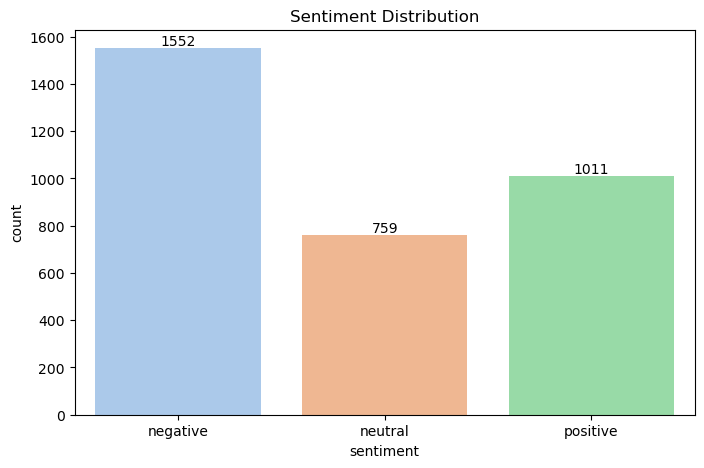

In [13]:
# Create canvas
plt.figure(figsize=(8, 5))
        
# Countplot
sns.countplot(x=df_eda.sentiment, palette='pastel')

# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       fontsize=10, color='black', 
                       xytext=(0, 5), 
                       textcoords='offset points')

plt.title('Sentiment Distribution')
plt.show()


Berdasarkan grafik tersebut, dapat diketahui bahwa dalam kolom `sentiment` terdapat 3 label diantaranya adalah Negative, Positive, dan Neutral. Kategori sentimen dengan jumlah tertinggi ialah Negative. Hal ini menandakan bahwa komentar netizen pada platform YouTube terkait dengan produk smartphone yang ada dalam dataset ini cenderung negatif dibandingkan dengan komentar positif atau netral. Dari grafik tersebut juga dapat dilihat bahwa ada kecenderungan imbalance meskipun perbedaan yang nampak tidak terlalu jauh. Imbalance ini akan dilakukan penanganan pada Feature Engineering atau preprocessing data sebelum dilakukan modeling.

#### v.b.2. Comments Distribution

Sebelum menganalisis sentimen komentar, kita perlu memahami beberapa metrik dasar dari komentar, seperti jumlah kata, kalimat, stop words, panjang rata-rata kata, jumlah karakter, dan tanda baca. Analisis distribusi komentar ini akan memberikan gambaran tentang kompleksitas dan variasi dalam komentar. Hal ini penting untuk interpretasi lebih lanjut dan pemahaman pola komentar pengguna.

In [14]:
# Stopwords in indonesian
stop_words_id = set(stopwords.words('indonesian'))
print(stop_words_id)


{'hampir', 'dijelaskannya', 'sudahlah', 'tidak', 'kala', 'bagi', 'kalaupun', 'sehingga', 'dini', 'mengatakan', 'semakin', 'sebagai', 'sepanjang', 'menjadi', 'tiba', 'sedikitnya', 'terdiri', 'lebih', 'itu', 'lain', 'segalanya', 'tandas', 'dimaksud', 'bertanya', 'bertutur', 'selalu', 'semisalnya', 'teringat', 'jumlah', 'terkira', 'wah', 'ditunjuki', 'dipunyai', 'diingatkan', 'kalau', 'cukupkah', 'berikut', 'merasa', 'memperbuat', 'bermaksud', 'diperkirakan', 'pada', 'bermula', 'kiranya', 'berlalu', 'kelihatan', 'sebaik', 'berkenaan', 'sebenarnya', 'karenanya', 'awal', 'bersiap', 'pak', 'cara', 'ditujukan', 'janganlah', 'berakhirnya', 'diantaranya', 'sebaik-baiknya', 'mengira', 'jikalau', 'kembali', 'kapanpun', 'sekurang-kurangnya', 'masih', 'tunjuk', 'tegas', 'kira', 'saya', 'sesuatu', 'berbagai', 'sama-sama', 'ujar', 'semisal', 'berujar', 'mengibaratkan', 'sewaktu', 'berapakah', 'berkehendak', 'bahwa', 'seterusnya', 'semasih', 'pantas', 'pun', 'katakanlah', 'sering', 'tadi', 'juga', 'ya

In [15]:
# word_count
df_eda['word_count'] = df_eda['comment'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# sentence_count
df_eda['sentence_count'] = df_eda['comment'].apply(lambda x: len(sent_tokenize(x)) if pd.notnull(x) else 0)

# stop_word_count
df_eda['stop_word_count'] = df_eda['comment'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words_id]))

# char_count
df_eda['char_count'] = df_eda['comment'].apply(lambda x: len(str(x)))

# mean_word_length
df_eda['mean_word_length'] = df_eda['comment'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# punctuation_count
df_eda['punctuation_count'] = df_eda['comment'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))


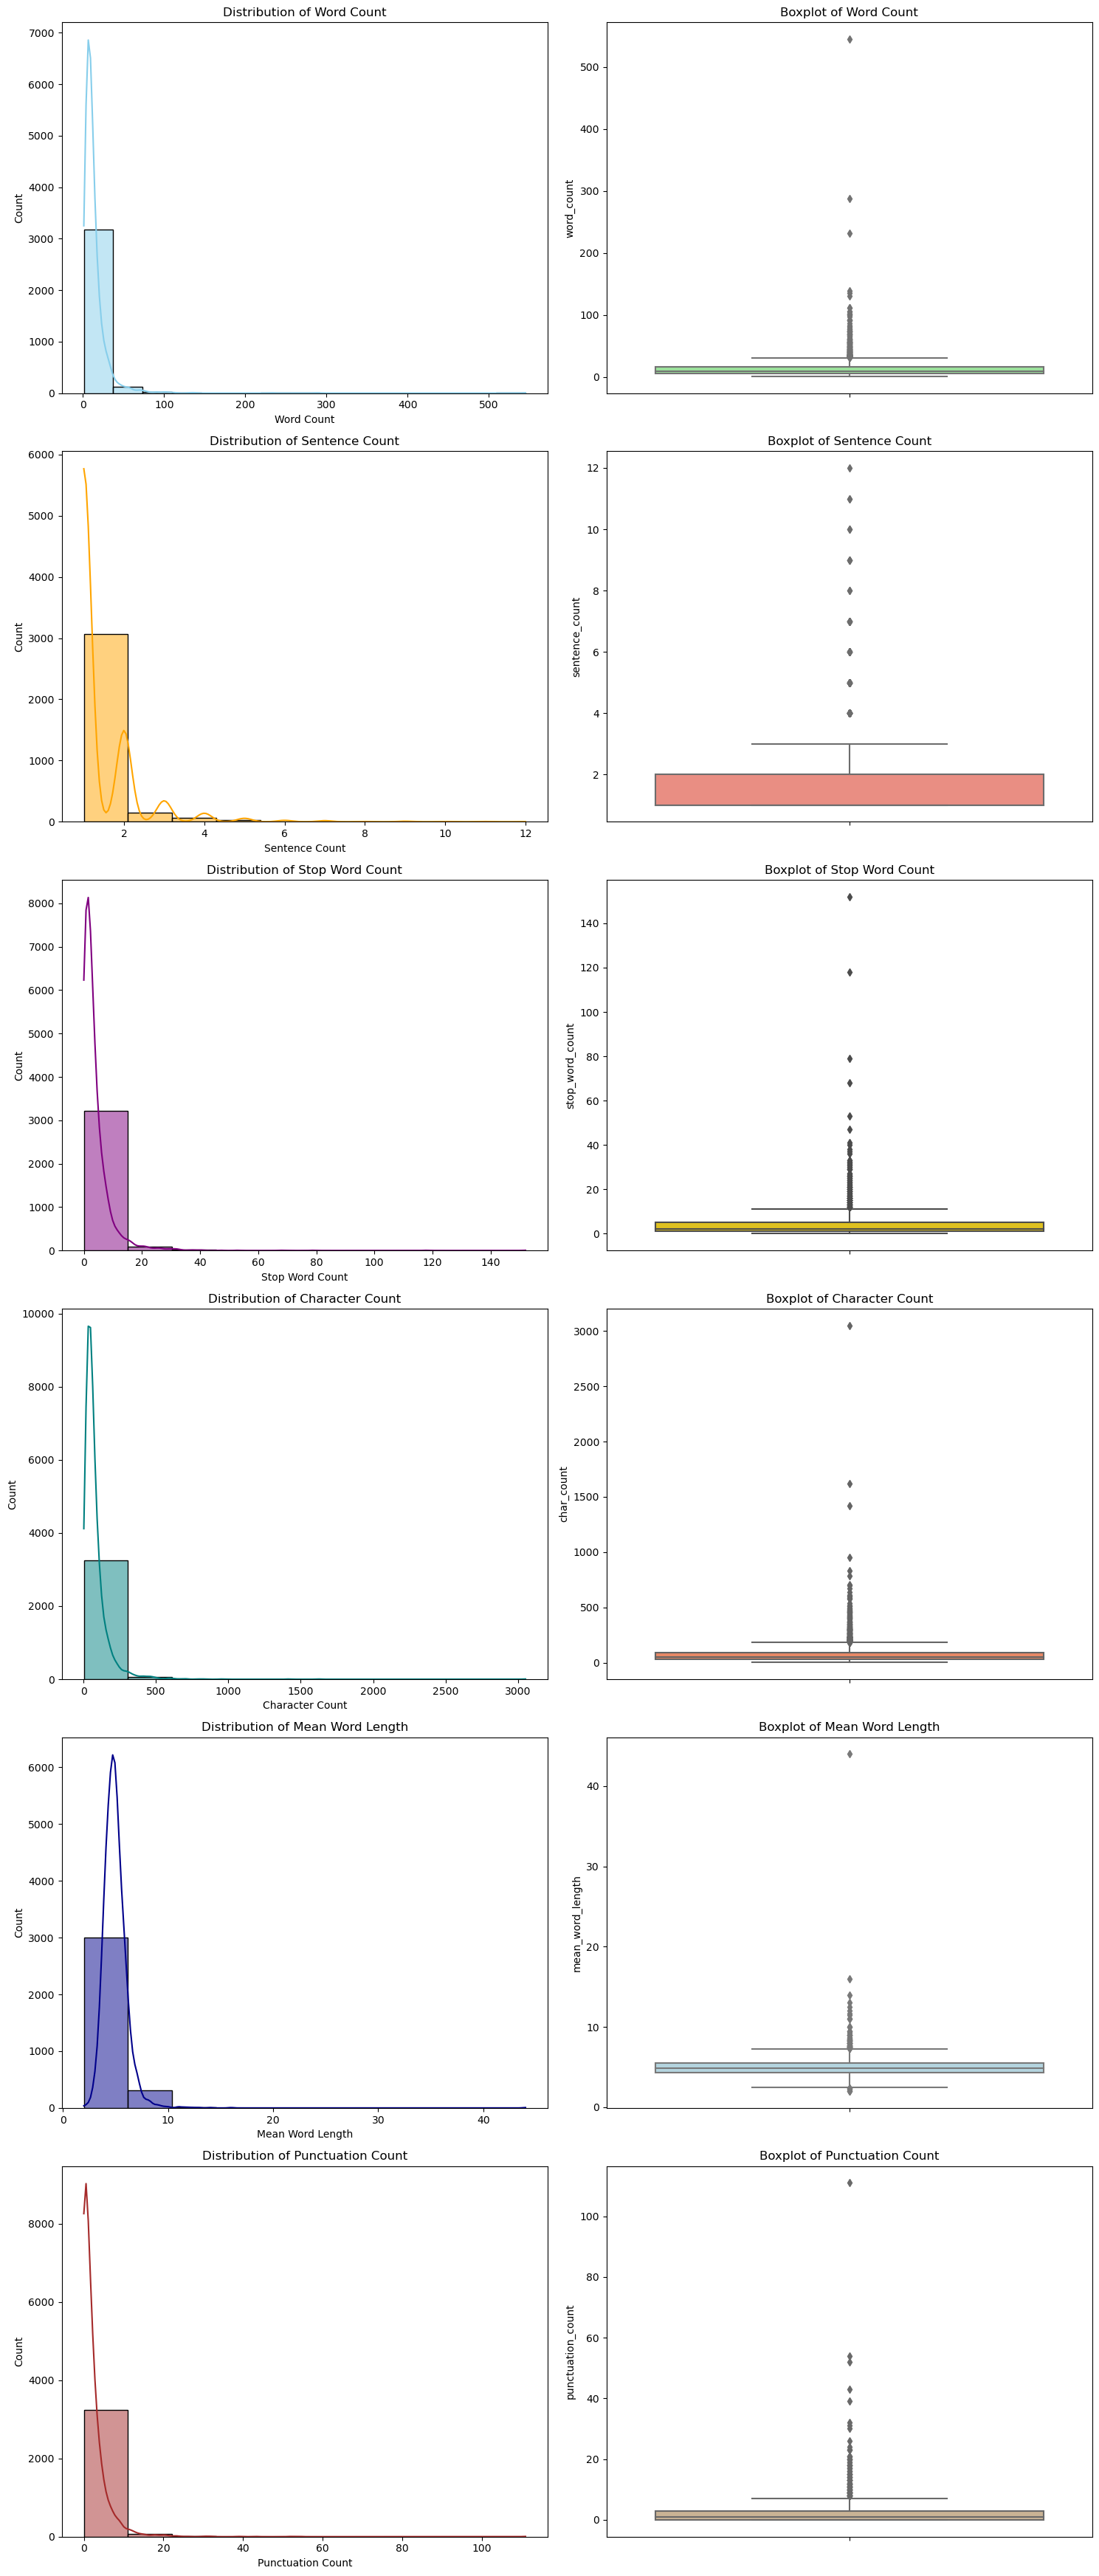

In [16]:
# Create canvas
plt.figure(figsize=(15, 35))

# Plot histogram for word_count
plt.subplot(6, 2, 1)
sns.histplot(df_eda['word_count'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')

# Plot boxplot for word_count
plt.subplot(6, 2, 2)
sns.boxplot(y=df_eda['word_count'], color='lightgreen')
plt.title('Boxplot of Word Count')

# Plot histogram for sentence_count
plt.subplot(6, 2, 3)
sns.histplot(df_eda['sentence_count'], kde=True, bins=10, color='orange')
plt.title('Distribution of Sentence Count')
plt.xlabel('Sentence Count')

# Plot boxplot for sentence_count
plt.subplot(6, 2, 4)
sns.boxplot(y=df_eda['sentence_count'], color='salmon')
plt.title('Boxplot of Sentence Count')

# Plot histogram for stop_word_count
plt.subplot(6, 2, 5)
sns.histplot(df_eda['stop_word_count'], kde=True, bins=10, color='purple')
plt.title('Distribution of Stop Word Count')
plt.xlabel('Stop Word Count')

# Plot boxplot for stop_word_count
plt.subplot(6, 2, 6)
sns.boxplot(y=df_eda['stop_word_count'], color='gold')
plt.title('Boxplot of Stop Word Count')

# Plot histogram for char_count
plt.subplot(6, 2, 7)
sns.histplot(df_eda['char_count'], kde=True, bins=10, color='teal')
plt.title('Distribution of Character Count')
plt.xlabel('Character Count')

# Plot boxplot for char_count
plt.subplot(6, 2, 8)
sns.boxplot(y=df_eda['char_count'], color='coral')
plt.title('Boxplot of Character Count')

# Plot histogram for mean_word_length
plt.subplot(6, 2, 9)
sns.histplot(df_eda['mean_word_length'], kde=True, bins=10, color='darkblue')
plt.title('Distribution of Mean Word Length')
plt.xlabel('Mean Word Length')

# Plot boxplot for mean_word_length
plt.subplot(6, 2, 10)
sns.boxplot(y=df_eda['mean_word_length'], color='lightblue')
plt.title('Boxplot of Mean Word Length')

# Plot histogram for punctuation_count
plt.subplot(6, 2, 11)
sns.histplot(df_eda['punctuation_count'], kde=True, bins=10, color='brown')
plt.title('Distribution of Punctuation Count')
plt.xlabel('Punctuation Count')

# Plot boxplot for punctuation_count
plt.subplot(6, 2, 12)
sns.boxplot(y=df_eda['punctuation_count'], color='tan')
plt.title('Boxplot of Punctuation Count')

# Adjust layout and show
plt.tight_layout()
plt.show()


Secara visual, dari seluruh grafik ini dapat diketahui sebagai berikut.

1. **Word Count**  
    - Sebagian besar teks memiliki jumlah kata yang relatif sedikit yang ditandai dengan puncak distribusi berada di sekitar rentang 0-100.
    - Terdapat banyak outlier yang menandakan ada sebagian komentar yang sangat panjang.
2. **Sentence Count**  
    - Sebagian besar teks memiliki jumlah kalimat yang sedikit yang ditandai dengan puncak distribusi berada di sekitar rentang 1-2 kalimat.
    - Terdapat banyak outlier yang menandakan ada sebagian komentar yang sangat panjang. 
3. **Stop Word Count**  
    - Sebagian besar teks memiliki jumlah kata stop word yang sedikit yang ditandai dengan puncak distribusi berada di sekitar rentang 0-20 kata stop word. Hal ini menunjukkan bahwa banyak teks dalam dataset yang cenderung memiliki sedikit kata-kata tidak memiliki makna substansial (seperti "dan", "atau", "yang", dll.).
    - Terdapat banyak outlier yang menandakan ada sebagian komentar yang sangat panjang dan mengandung banyak kata stop word.  
4. **Character Count**   
    - Sebagian besar teks memiliki jumlah karakter yang sedikit yang ditandai dengan puncak distribusi berada di sekitar rentang 0-500 karakter.
    - Terdapat banyak outlier yang menandakan ada sebagian komentar yang sangat panjang.    
5. **Mean Word Length**  
    - Sebagian besar teks memiliki panjang kata rata-rata yang relatif pendek yang ditandai dengan puncak distribusi berada di sekitar rentang 2-7 karakter. Hal ini menunjukkan bahwa banyak kata dalam dataset cenderung pendek.
    - Terdapat banyak outlier yang menandakan ada sebagian komentar yang memiliki kata-kata dengan panjang rata-rata yang jauh lebih panjang dari rata-rata keseluruhan.
6. **Punctiation Count**  
    - Sebagian besar teks memiliki jumlah tanda baca yang sedikit yang ditandai dengan puncak distribusi berada di sekitar rentang 0-10 tanda baca.
    - Terdapat banyak outlier yang menandakan ada sebagian komentar yang sangat panjang dan mengandung tanda baca.        

#### v.b.3. Word Frequency Analysis

Pada bagian ini akan dilakukan analisa terhadap kata-kata yang paling sering muncul dalam komentar. Analisis frekuensi kata ini akan mengungkapkan kata-kata dominan dalam dataset untuk membantu dalam mengenali tema yang sering dibahas oleh pengguna. Berikut adalah analisa untuk kata tunggal.

In [17]:
# CountVectorizer for unigram
stop_words_as_list = list(stop_words_id)
vectorizer = CountVectorizer(stop_words=stop_words_as_list, ngram_range=(1, 1))  # Unigrams
X = vectorizer.fit_transform(df_eda['comment'])
unigram_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_uni = unigram_freq.sum(axis=0).sort_values(ascending=False)

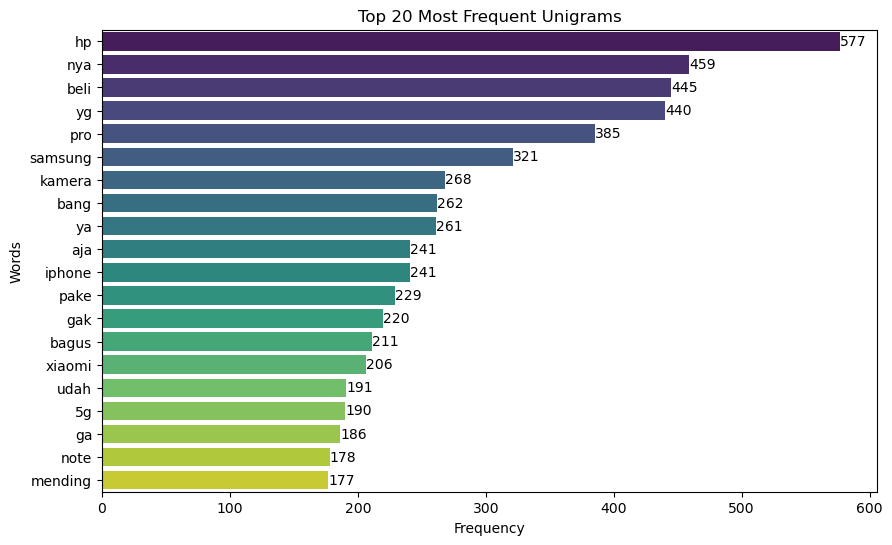

In [18]:
# Plot top 20 most frequent words
top_words = word_freq_uni.head(20)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')

for index, value in enumerate(top_words.values):
    plt.text(value, index, str(value), va='center')

plt.title('Top 20 Most Frequent Unigrams')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


Dapat terlihat bahwa 20 kata yang sering muncul dalam komentar adalah seperti pada output diatas. Selanjutnya kita akan melihat bagaimana hasil untuk pasangan dua kata.

In [19]:
# CountVectorizer for bigram
vectorizer = CountVectorizer(stop_words=stop_words_as_list, ngram_range=(2, 2))  # Bigram
X = vectorizer.fit_transform(df_eda['comment'])
bigram_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_bi = bigram_freq.sum(axis=0).sort_values(ascending=False)


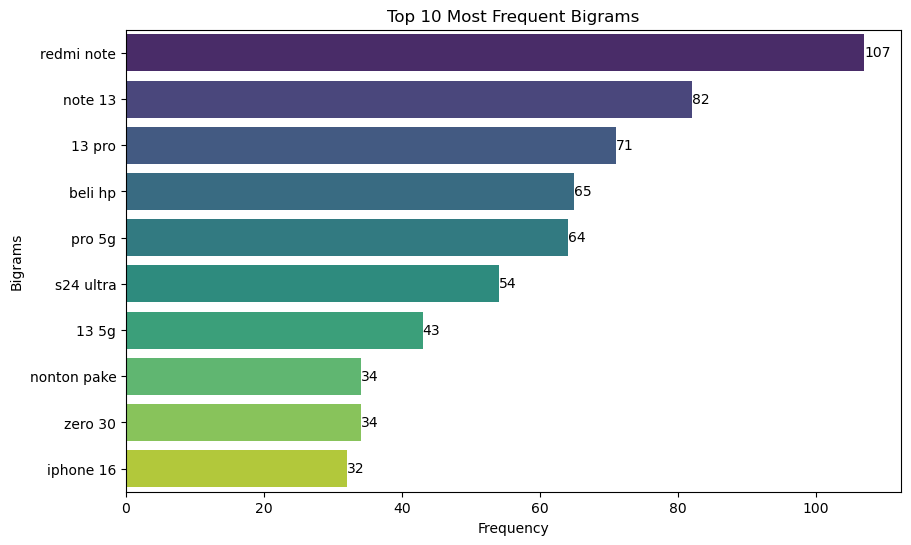

In [20]:
# Plot top 10 most frequent Bigram
plt.figure(figsize=(10, 6))

top_bigrams = word_freq_bi.head(10)

barplot = sns.barplot(x=top_bigrams.values, y=top_bigrams.index, palette='viridis')

for index, value in enumerate(top_bigrams.values):
    plt.text(value, index, str(value), va='center')  # Teks frekuensi di tengah batang

plt.title('Top 10 Most Frequent Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()


Dari grafik ini, kita dapat menarik beberapa kesimpulan:
- Berdasarkan bigram yang paling sering muncul, seperti "redmi note", "note 13", "s24 ultra", dan "iphone 16", dapat disimpulkan bahwa teks-teks dalam kumpulan data ini banyak membahas tentang produk smartphone. Hal ini berarti smartphone menjadi topik utama dalam dataset.
- Bigram seperti "beli hp" menunjukkan bahwa banyak pengguna yang sedang mencari informasi atau membandingkan produk untuk membeli ponsel baru.
- Kombinasi seperti "pro 5g" dan "13 5g" mengindikasikan bahwa fitur 5G merupakan salah satu spesifikasi yang banyak dicari oleh konsumen.
- Merek seperti Redmi, Samsung (S24), dan iPhone mendominasi komentar. Hal ini menunjukkan bahwa merek-merek tersebut memiliki popularitas yang tinggi di kalangan konsumen.
- danya bigram seperti "note 13" dan "13 pro" menunjukkan bahwa konsumen sering membandingkan berbagai model dari merek yang sama.
- Penggunaan kata "nonton pake" menunjukkan bahwa teks-teks ini mungkin berasal dari percakapan sehari-hari yang bersifat informal.

#### v.b.4. Wordcloud

Pada bagian ini, kita akan memanfaatkan word cloud untuk mengidentifikasi kata-kata yang paling dominan dalam komentar. Ini akan memberikan gambaran visual yang jelas mengenai topik atau tema yang sering dibahas oleh pengguna. Dengan menggunakan word cloud, kita dapat dengan mudah melihat kata-kata yang menonjol dan lebih memahami fokus utama dalam komentar yang terkandung dalam dataset.

##### All Comments

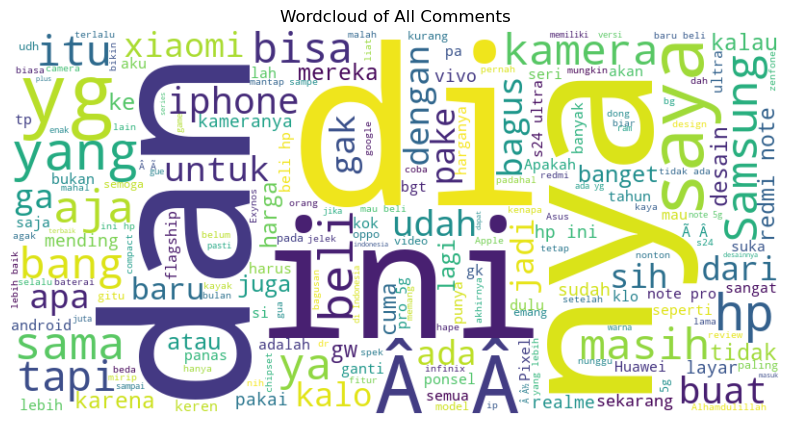

In [21]:
# Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(df_eda['comment']))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of All Comments")
plt.show()


Dari wordcloud tersebut, dapat disimpulkan beberapa hal sebagai berikut.

- Berdasarkan kata-kata yang paling sering muncul seperti "hp", "beli", "samsung", "xiaomi", "kamera", dan "harga", dapat disimpulkan bahwa topik utama dari komentar-komentar ini adalah smartphone.
- Merek seperti Samsung, Xiaomi, Oppo, dan Realme sering disebutkan, menunjukkan bahwa merek-merek ini cukup populer dan menjadi topik pembicaraan.
- Kata-kata seperti "kamera", "layar", "baterai", dan "desain" menunjukkan bahwa konsumen sangat memperhatikan fitur-fitur tersebut ketika memilih ponsel.
- Meskipun wordcloud tidak secara eksplisit menunjukkan sentimen positif atau negatif, namun kata-kata seperti "bagus", "keren", dan "mantap" mengindikasikan adanya sentimen positif terhadap produk-produk yang dibahas. Sebaliknya, kata-kata seperti "jelek", "kurang", dan "masalah" bisa mengindikasikan adanya sentimen negatif.
- Adanya banyak perbandingan antara merek dan model ponsel yang berbeda, seperti "samsung vs xiaomi", "note vs pro", dan sebagainya. Hal ini menunjukkan bahwa konsumen sering melakukan riset sebelum membeli ponsel.

Selanjutnya kita akan melihat bagaimana wordcloud untuk masing-masing kategori atau label sentimen.

##### Each Sentiment Category

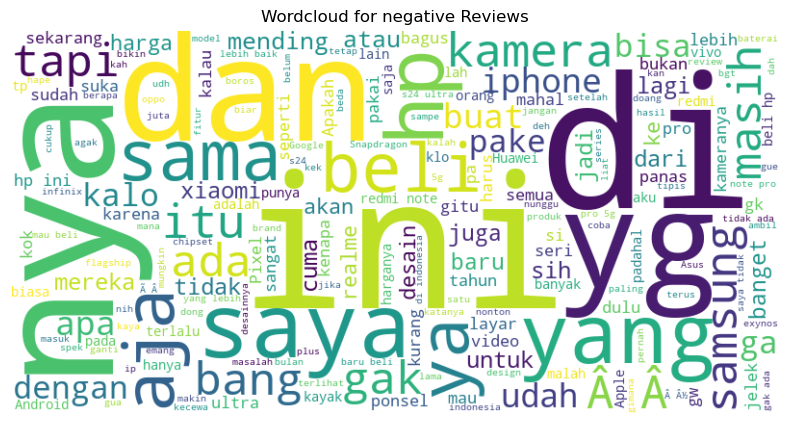

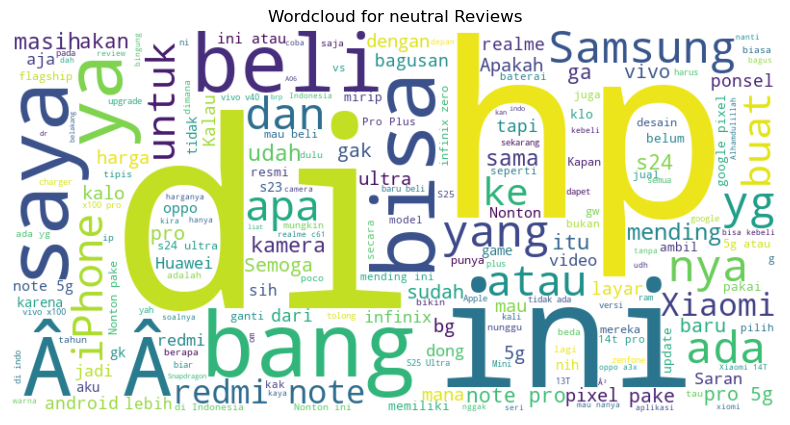

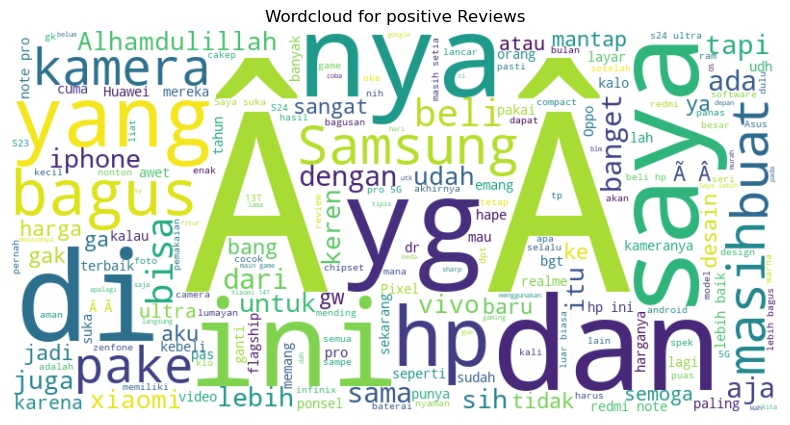

In [22]:
# Function to generate a wordcloud
def generate_wordcloud(data, sentiment):
    # Ambil komentar untuk sentimen tertentu
    sentiment_data = data[data['sentiment'] == sentiment]['comment'].dropna()

    # Periksa apakah ada komentar untuk sentimen ini
    if len(sentiment_data) == 0:
        print(f"No comments available for sentiment: {sentiment}")
        return  # Melewatkan jika tidak ada komentar

    # Gabungkan komentar menjadi satu string
    text_data = " ".join(sentiment_data)

    # Generate wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Wordcloud for {sentiment} Reviews")
    plt.show()

# Wordclouds per sentiment category
for sentiment in df_eda['sentiment'].unique():
    generate_wordcloud(df_eda, sentiment)


**Wordcloud for Negative Reviews**
- Kata-kata Negatif Dominan:  
    - Masalah, jelek, buruk, tidak bagus: Kata-kata ini secara langsung menunjukkan ketidakpuasan pengguna terhadap produk.
    - Mahal, harga, dibandingkan: Ini menunjukkan bahwa pengguna merasa harga produk tidak sebanding dengan kualitas yang ditawarkan.
- Masalah yang Sering Ditemukan:
    - Kualitas: Kata-kata seperti "jelek", "lambat", "panas", "bug" seringkali dikaitkan dengan kualitas produk yang dianggap kurang baik. Ini bisa mencakup masalah pada kamera, layar, baterai, atau kinerja secara keseluruhan.
    - Fitur: Kata-kata seperti "kurang", "tidak sesuai", "tidak bisa" menunjukkan bahwa produk tidak memiliki fitur yang diharapkan pengguna.
    - Harga: Banyak pengguna merasa bahwa harga produk terlalu mahal dibandingkan dengan kualitas yang ditawarkan.
    - Perbandingan: Kata-kata seperti "lebih baik", "lebih bagus" menunjukkan bahwa pengguna membandingkan produk yang mereka gunakan dengan produk lain, dan merasa bahwa produk yang mereka miliki kurang unggul.
- Merek yang Sering Disebut:
    - Samsung, Xiaomi, Oppo, iPhone, Huawei: Meskipun ini adalah ulasan negatif, merek-merek ini tetap sering disebutkan, yang menunjukkan bahwa mereka adalah merek yang populer namun juga memiliki kekurangan di mata sebagian pengguna.

**Wordcloud for Neutral Reviews**
- Kata-kata Kunci :
    - Perbandingan: Kata-kata seperti "banding", "mending", "bagusan" menunjukkan bahwa pengguna sering membandingkan berbagai merek atau model ponsel.
    - Pertanyaan: Kata-kata seperti "apakah" dan "kapan" menunjukkan bahwa pengguna masih mencari informasi atau memiliki keraguan.
    - Harga dan Spesifikasi: Kata-kata seperti "harga", "spesifikasi", "kamera" menunjukkan bahwa pengguna memperhatikan fitur-fitur teknis ponsel.
    - Ekspektasi: Kata-kata seperti "semoga", "harap", "ingin" menunjukkan bahwa pengguna memiliki harapan tertentu terhadap produk yang mereka beli.
- Merek yang Sering Disebut: 
    - Kemunculan merek-merek seperti Xiaomi, Samsung, Realme, dan Vivo menunjukkan bahwa merek-merek ini adalah yang paling sering dibandingkan.

**Wordcloud for Positive Reviews**
- Kata-kata Positif Dominan:
    - Bagus, keren, mantap: Kata-kata ini secara langsung menunjukkan kepuasan pengguna terhadap produk.
- Aspek yang Disukai:
    - Kualitas: Kata-kata seperti "bagus", "keren", "mantap" seringkali dikaitkan dengan kualitas produk yang dianggap baik.
    - Fitur: Kata-kata seperti "baterai", "layar", "desain", "fitur" menunjukkan bahwa pengguna puas dengan fitur-fitur yang ditawarkan oleh smartphone mereka.
    - Kamera: Kata-kata seperti "kamera", "bagus", "jernih" menunjukkan bahwa pengguna puas dengan kualitas kamera yang ditawarkan.
    - Performa: "lancar", "cepat", "ngebut", "responsif". Kata-kata ini menunjukkan bahwa pengguna puas dengan kinerja perangkat, baik dalam menjalankan aplikasi maupun multitasking.
- Merek yang Sering Disebut:
    - Samsung, Xiaomi, Oppo, Vivo: Sama seperti pada ulasan negatif, merek-merek ini juga sering disebutkan dalam ulasan positif, menunjukkan bahwa merek-merek ini memiliki basis penggemar yang kuat.

#### v.b.5. Unique Words Identification

Pada bagian ini, kita akan mengidentifikasi kata-kata unik yang hanya muncul sekali dalam komentar.

In [23]:
all_words = ' '.join(df_eda['comment']).split()
word_counts = Counter(all_words)
unique_words = [word for word, count in word_counts.items() if count == 1]
print(f"Unique words count: {len(unique_words)}")


Unique words count: 7077


Terlihat bahwa dalam dataset ini terdapat 7077 kata unik pada kolom `comment`.

## COMPLIMENTARY DATASET

Pada bagian ini akan ditampilkan bagaimana distribusi dari smartphone yang ada dalam dataset. Untuk yang pertama, kita akan melihat berapa banyak smartphone yang tersedia dalam dataset ini untuk 2024 dan 2025.

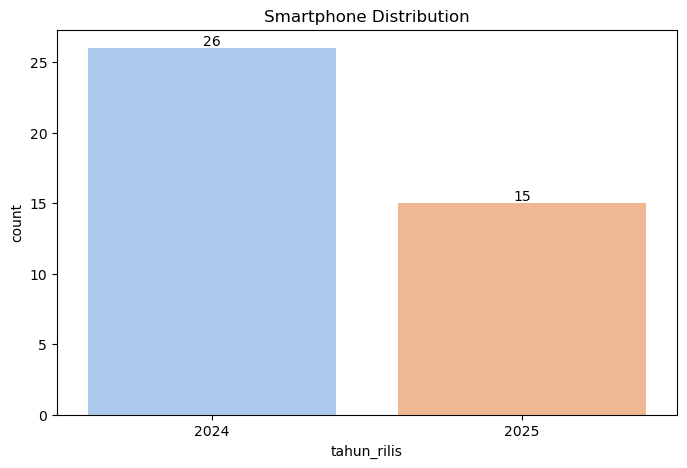

In [24]:
# Create canvas
plt.figure(figsize=(8, 5))
        
# Countplot
sns.countplot(x=df_spec.tahun_rilis, palette='pastel')

# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       fontsize=10, color='black', 
                       xytext=(0, 5), 
                       textcoords='offset points')

plt.title('Smartphone Distribution')
plt.show()


Terlihat bahwa untuk smartphone yang rilis pada 2024 yang terdapat pada dataset ini ada sebanyak 26 tipe dan untuk smartphone yang akan rilis di 2025 terdapat 15 tipe. Selanjutnya kita akan lebih spesifikkan lagi untuk melihat merek apa saja yang ada dalam dataset ini.

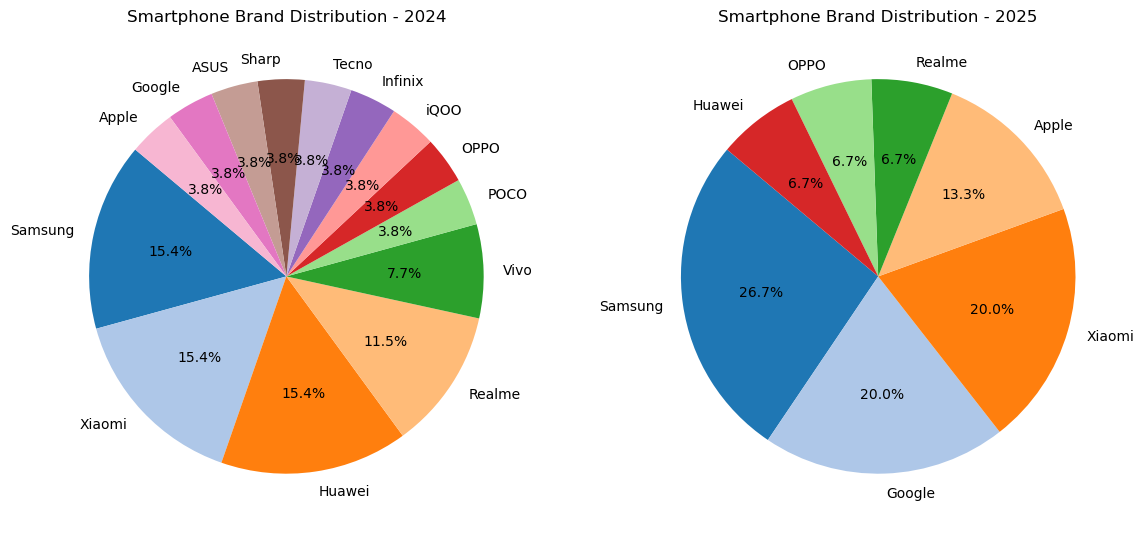

In [25]:
# Filter data berdasarkan tahun
data_2024 = df_spec[df_spec['tahun_rilis'] == 2024]
data_2025 = df_spec[df_spec['tahun_rilis'] == 2025] 

# Hitung distribusi merek
merek_counts_2024 = data_2024['merek'].value_counts()
merek_counts_2025 = data_2025['merek'].value_counts()

# Plot Pie Chart
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie Chart untuk 2024
axes[0].pie(merek_counts_2024, labels=merek_counts_2024.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
axes[0].set_title('Smartphone Brand Distribution - 2024')

# Pie Chart untuk 2025 (akan kosong jika tidak ada data)
if not merek_counts_2025.empty:
    axes[1].pie(merek_counts_2025, labels=merek_counts_2025.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    axes[1].set_title('Smartphone Brand Distribution - 2025')
else:
    axes[1].text(0.5, 0.5, 'No Data for 2025', horizontalalignment='center', verticalalignment='center', fontsize=14)
    axes[1].set_title('Smartphone Brand Distribution - 2025')
    axes[1].axis('off')

plt.show()

Terlihat bahwa merek smartphone yang tersedia dalam dataset adalah seperti Samsung, Xiaomi, Huawei, dan lainnya yang dapat dilihat dalam grafik tersebut.

Selanjutnya kita akan lihat bagaimana rentang harga untuk setiap segmen.

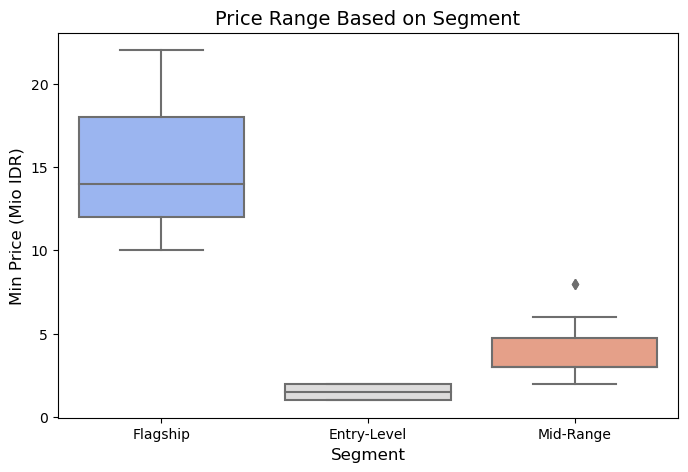

In [26]:
# Tambahkan kolom range harga numerik
df_spec['harga_min'] = df_spec['range_harga'].str.extract(r'Rp (\d+)', expand=False).astype(float)

# Visualisasi boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_spec, x="segmen", y="harga_min", palette="coolwarm")
plt.title("Price Range Based on Segment", fontsize=14)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Min Price (Mio IDR)", fontsize=12)
plt.show()


Dalam data yang digunakan dalam pembuatan model, kita memiliki beberapa jenis tipe smartphone dengan range harga sebagai berikut.

- Flagship: Ponsel flagship memiliki rentang harga yang cukup tinggi, dengan harga minimum umumnya di atas 10 juta Rupiah. Ini menunjukkan bahwa ponsel flagship umumnya diposisikan sebagai produk premium dengan fitur-fitur canggih dan teknologi terbaru.
- Entry-Level: Sebaliknya, ponsel entry-level memiliki harga minimum yang jauh lebih rendah, bahkan di bawah 2 juta Rupiah. 
- Mid-Range: Ponsel mid-range memiliki posisi di antara keduanya. Harga minimumnya umumnya berada di kisaran 5-10 juta Rupiah. 

-------------------

# vi. Feature Engineering

## Text Preprocessing

Berdasarkan EDA yang telah dilakukan, terdapat beberapa tindakan yang dapat dilakukan untuk membersihkan teks sehingga dapat meningkatkan performa dalam **Modeling**, yaitu
- *Case folding*: membuat semua kata dalam kondisi *lower* agar mudah di analisis. Jika terdapat perbedaan *Case folding* dana kata tersebut sama, maka akan dianggap 2 kata yang berbeda oleh mesin.
- *Mention removal*: menghapus simbol @ yang biasa digunakan dalam memanggil suatu akun.
- *Hashtags removal*: menghapus # yang biasa digunakan sebagai keyword dalam suatu narasi kalimat.
- *Newline removal (\n)*: menghapus kondisi baris yang terdapat *Newline* yang mengakibatkan mesin tidak dapat bekerja secara efisien dalam menganalisis.
- *Whitespace removal*: menghapus suatu baris yang memiliki *space* yang besar.
- *URL removal*: menghapus suatu baris yang yang mencantumkan link website.
- *Non-letter removal*: menghapus karakter yang berupa simbol seperti yang tadi sempat muncul secara jelas ketika EDA.
- *replace slang*: mengganti istilah kata gaul dan singkatan menjadi kata dasar. 
- *Stopwords removal*: menghapus kata sifat dan subjek yang tidak dibutuhkan dalam teks sehingga meningkatkan performa ketika *modeling*.
- *Lemmatizing*: mengubah kata kerja berimbuhan ke dalam bentuk dasar.

In [27]:
def load_slang_txt(file_path):
    slang_dict_txt = {}
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            file_content = file.read()
            slang_dict_txt = json.loads(file_content)
    except json.JSONDecodeError:
        print(f"Error decoding JSON in the file: {file_path}")
    return slang_dict_txt


def load_slang_csv(file_path):
    slang_df = pd.read_csv(file_path, encoding='ISO-8859-1')
    return dict(zip(slang_df.iloc[:, 0], slang_df.iloc[:, 1]))


# Combine slang dictionaries
slang_txt_path = 'combined_slang_words.txt'
slang_dict_txt = load_slang_txt(slang_txt_path)

slang_csv_path = 'new_kamusalay.csv'
slang_dict_csv = load_slang_csv(slang_csv_path)

slang_dict_tambahan = {
    "gw": "saya", "mau": "ingin", "ni": "ini", "aja": "saja", "gak": "tidak", "bgt": "sangat",
    "klo": "kalau", "bgs": "bagus", "masi": "masih", "msh": "masih", "lom": "belum",
    "blm": "belum", "ap": "apa", "brg": "barang", "ad": "ada", "blom": "belum",
    "kebli": "kebeli", "tp": "tapi", "org": "orang", "tdk": "tidak", "yg": "yang",
    "kalo": "kalau", "sy": "saya", "bng": "abang", "bg": "abang", "fto": "foto",
    "spek": "spesifikasi", "cm": "cuma", "jg": "juga", "pd": "pada", "skrg": "sekarang",
    "ga": "tidak", "gk": "tidak", "batre": "baterai", "gue": "saya", "dpt": "dapat",
    "kek": "seperti", "mna": "mana", "mnding": "mending", "mend": "mending",
    "dr": "dari", "sma": "sama", "drpada": "daripada"
}

slang_dict = {**slang_dict_tambahan, **slang_dict_txt, **slang_dict_csv}

# Stopwords (Adjusted)
stpwds_id = list(set(stopwords.words('indonesian')))
retain_words = ['baru', 'lama', 'sama', 'tapi', 'tidak', 'dari', 'belum', 'bagi', 'mau', 'masalah']
for word in retain_words:
    if word in stpwds_id:
        stpwds_id.remove(word)

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to replace slang terms
def replace_slang_in_text(text, slang_dict):
    words = text.split()
    replaced_words = [slang_dict.get(word, word) for word in words]
    return ' '.join(replaced_words)

In [28]:
informal_phrases = {
    "sat set sat set": "cepat", "ya mas": ""
}

def text_preprocessing(text, slang_dict):
    # Case folding (convert text to lowercase)
    text = text.lower()

    # Remove mentions, hashtags, and newlines
    text = re.sub(r"@[\w]+|#[\w]+|\n", " ", text)

    # Remove URLs
    text = re.sub(r"http\S+|www.\S+", " ", text)

    # Remove non-alphabetic characters and extra spaces
    text = re.sub(r"[^\w\s']", " ", text)

    # Replace informal phrases
    for phrase, replacement in informal_phrases.items():
        text = text.replace(phrase, replacement)

    # Replace slang terms
    text = replace_slang_in_text(text, slang_dict)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stpwds_id]

    # Lemmatization (optional, but can improve performance)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Stemming with exceptions
    stemming_exceptions = {"terasa": "terasa", "sat": "cepat", "set": "cepat"}
    tokens = [stemming_exceptions.get(word, word) for word in tokens]

    # Reassemble the text and remove duplicates
    text = ' '.join(dict.fromkeys(tokens))

    return text

In [29]:
# Applying Text Preprocessing to the Dataset

df['text_processed'] = df['comment'].apply(lambda x: text_preprocessing(x, slang_dict))

# Display the dataframe with processed text
print(df.head())

                   author  id  \
0             @rinzia2346   1   
1        @LiriklaguKu-x8s   2   
2       @encischannel9849   3   
3              @WelderIjo   4   
4  @edybaskorobaskoro9660   5   

                                             comment sentiment  \
0  batre 5000 mah kerasa kurang awet ga sih di hp...  negative   
1  Bang kok punya ku g ada fitur nfc nya, solusin...  negative   
2   Gue juga pake tekno spark 20c tp ko g ada nfc ya   neutral   
3                              hp dont play pubg nih   neutral   
4  Frame dropnya kok keliatan parah gitu ? Jauh s...  negative   

                  timestamp  like_count      tipe_produk  brand      segment  \
0 2024-10-23 05:11:29+00:00           0  Tecno Spark 20C  Tecno  Entry-Level   
1 2024-11-04 10:29:48+00:00           0  Tecno Spark 20C  Tecno  Entry-Level   
2 2024-09-11 15:30:53+00:00           0  Tecno Spark 20C  Tecno  Entry-Level   
3 2024-05-03 12:14:37+00:00           0  Tecno Spark 20C  Tecno  Entry-Level   
4 20

In [30]:
df['text_processed'].apply(lambda x: len(x.split())).describe()

count    3322.000000
mean        8.064419
std         7.893644
min         0.000000
25%         4.000000
50%         6.000000
75%        10.000000
max       182.000000
Name: text_processed, dtype: float64

In [31]:
df['text_processed'] = df['text_processed'].apply(lambda x: x if len(x.split()) > 0 else None)
df = df.dropna(subset=['text_processed'])
df['text_processed'].apply(lambda x: len(x.split())).describe()

count    3301.000000
mean        8.115723
std         7.892378
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max       182.000000
Name: text_processed, dtype: float64

## Label Encoding

> Label encoding bertujuan untuk mengubah values ke bentuk diskrit sehingga memudahkan dalam *modeling*.

In [32]:
# Display Target

df['sentiment'].unique()

array(['negative', 'neutral', 'positive'], dtype=object)

In [33]:
# Change Target into Number

df['target'] = df['sentiment'].replace({'negative': 0, 'positive': 1, 'neutral': 2, 'Negative': 0, 'Positive': 1, 'Neutral': 2})


In [34]:
example_index = 42  
print("Original Text:", df['comment'].iloc[example_index])
print("Processed Text:", df['text_processed'].iloc[example_index])

Original Text: Ciri khas HP ecek ecek yang kepala adaptornya dijual terpisah tp kualitas Hp nya sih boleh juga
Processed Text: ciri khas handphone ecek kepala adaptornya dijual terpisah kualitas nya sih


## Missing Values

> Membersihkan *missing values* pada dataset bertujuan untuk mengoptimalkan *modeling* sehingga ketika dievaluasi menghasilkan nilai metrik yang tinggi. *Missing values* dilakukan setelah text preprocessing untuk menghindari timbulnya cell yang kosong atau duplikat setelah dilakukan pembersihan kata dalam teks.

In [35]:
# periksa missing values sebelum di handle
df.isnull().sum()

author            0
id                0
comment           0
sentiment         0
timestamp         0
like_count        0
tipe_produk       0
brand             0
segment           0
release_date      0
text_processed    0
target            0
dtype: int64

In [36]:
df.dropna(inplace=True)
df.isnull().sum()

author            0
id                0
comment           0
sentiment         0
timestamp         0
like_count        0
tipe_produk       0
brand             0
segment           0
release_date      0
text_processed    0
target            0
dtype: int64

## Data Splitting

> Data Splitting bertujuan memudahkan model ketika berlatih hingga diuji.

In [37]:
# Data Splitting
X_train_val, X_test, y_train_val, y_test = train_test_split(
    df.text_processed,
    df.target,
    test_size=0.15,
    random_state=20,
    stratify=df.target
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.10,
    random_state=20,
    stratify=y_train_val
)

print('Train Size :', X_train.shape)
print('Val Size   :', X_val.shape)
print('Test Size  :', X_test.shape)

# Check Missing Values
print("Missing values in Train:", X_train.isnull().sum())
print("Missing values in Val:", X_val.isnull().sum())
print("Missing values in Test:", X_test.isnull().sum())

print("Class Distribution in Train Set:")
print(y_train.value_counts())
print("Class Distribution in Validation Set:")
print(y_val.value_counts())
print("Class Distribution in Test Set:")
print(y_test.value_counts())

Train Size : (2524,)
Val Size   : (281,)
Test Size  : (496,)
Missing values in Train: 0
Missing values in Val: 0
Missing values in Test: 0
Class Distribution in Train Set:
0    1183
1     763
2     578
Name: target, dtype: int64
Class Distribution in Validation Set:
0    132
1     85
2     64
Name: target, dtype: int64
Class Distribution in Test Set:
0    232
1    150
2    114
Name: target, dtype: int64


In [38]:
vectorizer = CountVectorizer(max_features=7000)

X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_val_vec = vectorizer.transform(X_val).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

print(X_train_vec.shape, X_val_vec.shape, X_test_vec.shape)

(2524, 4264) (281, 4264) (496, 4264)


-------------------

# vii. Exploratory Data Analysis (after FE)

Setelah dilakukannya Feature Engineering, selanjutnya kita akan melihat bagaimana EDA nya kembali. Pada bagian ini akan terbagi menjadi tiga bagian untuk melihat secara detail bagaimana perbedaan pada masing-masing kategori sentimen.

## vi.a. Positive Comments

### vi.a.1. Word Frequency Analysis

In [39]:
# Filter X_train for positive sentiment
X_train_positive = X_train[y_train == 1]

# CountVectorizer for unigram
vectorizer = CountVectorizer(stop_words=stpwds_id, ngram_range=(1, 1))  # Unigrams

# Apply CountVectorizer to X_train positive
X_positive = vectorizer.fit_transform(X_train_positive)
unigram_freq_positive = pd.DataFrame(X_positive.toarray(), columns=vectorizer.get_feature_names_out())

# Compute word frequencies
word_freq_uni_positive = unigram_freq_positive.sum(axis=0).sort_values(ascending=False)

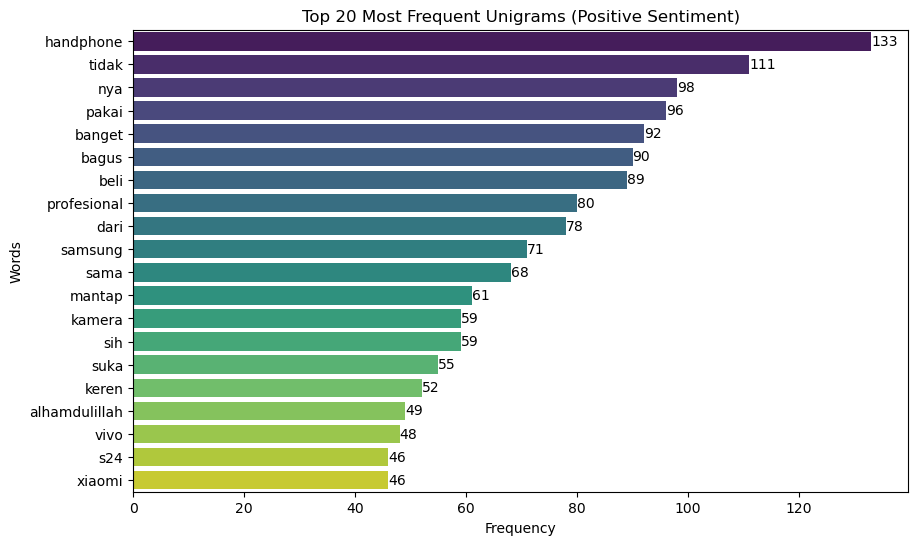

In [40]:
# Plot top 20 most frequent words for positive
top_words_positive = word_freq_uni_positive.head(20)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_words_positive.values, y=top_words_positive.index, palette='viridis')

for index, value in enumerate(top_words_positive.values):
    plt.text(value, index, str(value), va='center')

plt.title('Top 20 Most Frequent Unigrams (Positive Sentiment)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


Dalam output tersebut, terdapat beberapa kata yang sering muncul, diantaranya yaitu :
- Handphone: Ini menunjukkan bahwa ulasan tersebut memang terkait dengan produk smartphone.
- Bagus, mantap, keren: Kata-kata ini secara langsung menunjukkan kepuasan pengguna terhadap produk.
- Beli, pakai: Ini mengindikasikan bahwa pengguna sudah membeli dan menggunakan produk tersebut.
- Tidak, banget: Kata-kata ini sering digunakan untuk memperkuat pernyataan positif, misalnya "tidak mengecewakan" atau "puas banget".
- Kamera: Ini menunjukkan bahwa kualitas kamera adalah salah satu faktor penting yang diperhatikan pengguna dan membuat mereka puas.
- Samsung, Vivo, Xiaomi: Ini adalah beberapa merek smartphone yang populer dan sering disebut dalam ulasan positif.
- Alhamdulillah: Kata ini menunjukkan rasa syukur dan kepuasan yang mendalam dari pengguna.
Artinya, pengguna yang memberikan ulasan positif cenderung memuji kualitas produk secara keseluruhan, terutama kualitas kamera. Mereka juga merasa puas dengan performa dan fitur-fitur yang ditawarkan oleh smartphone tersebut. Merek-merek seperti Samsung, Vivo, dan Xiaomi sering kali menjadi pilihan yang populer dan mendapatkan ulasan positif dari pengguna.

Adapun insight yang dapat kita ambil adalah 
- Kualitas kamera menjadi salah satu faktor utama yang mempengaruhi kepuasan pengguna terhadap smartphone.
- Pengguna menghargai smartphone yang memiliki kinerja yang lancar dan responsif.
- Merek-merek besar seperti Samsung, Vivo, dan Xiaomi masih menjadi pilihan utama bagi banyak konsumen.
- Ulasan positif ini menunjukkan bahwa produsen berhasil memberikan produk yang memenuhi ekspektasi konsumen.

In [41]:
# CountVectorizer for bigram
vectorizer_bi = CountVectorizer(stop_words=stpwds_id, ngram_range=(2, 2))  # Bigrams

# Apply CountVectorizer to X_train positive
X_positive_bi = vectorizer_bi.fit_transform(X_train_positive)
bigram_freq_positive = pd.DataFrame(X_positive_bi.toarray(), columns=vectorizer_bi.get_feature_names_out())

# Compute word frequencies
word_freq_bi_positive = bigram_freq_positive.sum(axis=0).sort_values(ascending=False)

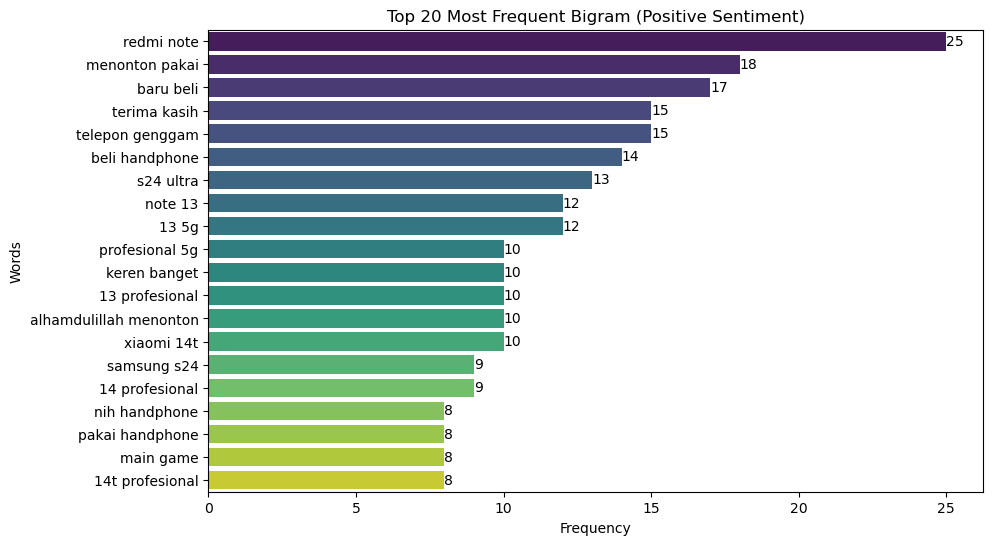

In [42]:
# Plot top 20 most frequent words for positive
top_words_positive_bi = word_freq_bi_positive.head(20)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_words_positive_bi.values, y=top_words_positive_bi.index, palette='viridis')

for index, value in enumerate(top_words_positive_bi.values):
    plt.text(value, index, str(value), va='center')

plt.title('Top 20 Most Frequent Bigram (Positive Sentiment)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


Untuk kata berpasangan yang sering muncul ialah:
- Redmi note, note 13, S24 ultra: Ini menunjukkan bahwa model-model smartphone tertentu dari merek Redmi, Samsung, dan kemungkinan merek lain sangat populer dan mendapatkan ulasan positif.
- Baru beli, terima kasih: Ini mengindikasikan bahwa banyak pengguna baru saja membeli produk dan merasa puas dengan pembelian mereka.
- Keren banget, alhamdulillah: Ini menunjukkan tingkat kepuasan yang tinggi dari pengguna terhadap produk yang mereka beli.
- Profesional 5G: Ini menunjukkan bahwa pengguna menghargai fitur-fitur canggih seperti konektivitas 5G yang dianggap cocok untuk penggunaan profesional.

Insight yang didapat adalah:
- Model-model tertentu seperti Redmi Note, Samsung S24 Ultra, dan lainnya sangat diminati oleh konsumen.
- Pengguna merasa puas dengan pembelian mereka dan seringkali merekomendasikan produk tersebut kepada orang lain.
- Pengguna menghargai fitur-fitur seperti kinerja yang baik, konektivitas 5G, dan kemampuan untuk menjalankan berbagai aplikasi.

### vi.a.2. Wordcloud

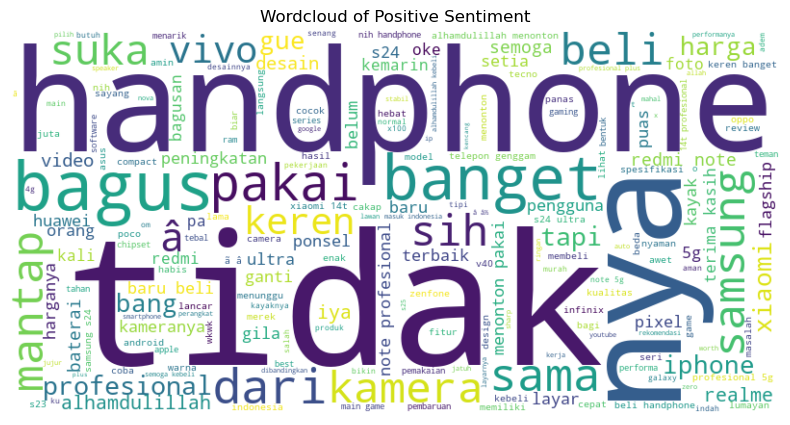

In [43]:
# Wordcloud of Positive Sentiment
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(' '.join(X_train_positive))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of Positive Sentiment")
plt.show()

Pengguna yang memberikan ulasan positif cenderung memuji kualitas produk secara keseluruhan, terutama kualitas kamera dan fitur-fitur multimedia. Mereka juga merasa puas dengan harga dan kinerja produk. Merek-merek populer seperti Xiaomi, Samsung, Vivo, Oppo, dan iPhone sering kali menjadi pilihan yang tepat dan memberikan kepuasan bagi pengguna.

## vi.b. Negative Comments

### vi.b.1. Word Frequency Analysis

In [44]:
# Filter X_train for negative sentiment
X_train_negative = X_train[y_train == 0]

# CountVectorizer for unigram
vectorizer = CountVectorizer(stop_words=stpwds_id, ngram_range=(1, 1))  # Unigrams

# Apply CountVectorizer to X_train negative
X_negative = vectorizer.fit_transform(X_train_negative)
word_freq_uni_negative = pd.DataFrame(X_negative.toarray(), columns=vectorizer.get_feature_names_out())

# Compute word frequencies
word_freq_uni_negative = word_freq_uni_negative.sum(axis=0).sort_values(ascending=False)

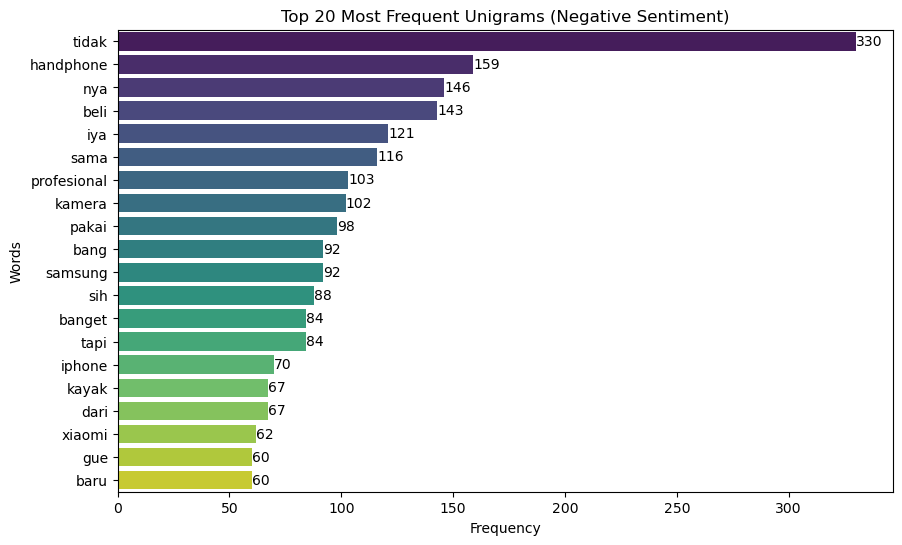

In [45]:
# Plot top 20 most frequent words for negative
top_words_negative = word_freq_uni_negative.head(20)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_words_negative.values, y=top_words_negative.index, palette='viridis')

for index, value in enumerate(top_words_negative.values):
    plt.text(value, index, str(value), va='center')

plt.title('Top 20 Most Frequent Unigrams (Negative Sentiment)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

Pada sentimen negatif, kata-kata yang sering muncul ialah
- Tidak, handphone: Ini menunjukkan bahwa ulasan tersebut memang terkait dengan produk smartphone dan banyak pengguna yang tidak puas.
- Beli, pakai: Ini mengindikasikan bahwa pengguna sudah membeli dan menggunakan produk tersebut, namun merasa kecewa.
- Kamera: Ini menunjukkan bahwa kualitas kamera adalah salah satu faktor yang sering dikeluhkan oleh pengguna.
- Samsung, Xiaomi, iPhone: Ini menunjukkan bahwa merek-merek ini juga menerima ulasan negatif meskipun mereka adalah merek yang populer.

Insight yang didapat:
- Kualitas kamera adalah salah satu faktor utama yang menyebabkan ketidakpuasan pengguna.
- Pengguna mengeluhkan kinerja smartphone yang lambat atau tidak stabil.
- Beberapa fitur yang diharapkan pengguna tidak berfungsi dengan baik atau tidak sesuai dengan ekspektasi.

In [46]:
# CountVectorizer for bigram
vectorizer_bi = CountVectorizer(stop_words=stpwds_id, ngram_range=(2, 2))  # Bigrams

# Apply CountVectorizer to X_train negative
X_negative_bi = vectorizer_bi.fit_transform(X_train_negative)
bigram_freq_negative = pd.DataFrame(X_negative_bi.toarray(), columns=vectorizer_bi.get_feature_names_out())

# Compute word frequencies
word_freq_bi_negative = bigram_freq_negative.sum(axis=0).sort_values(ascending=False)

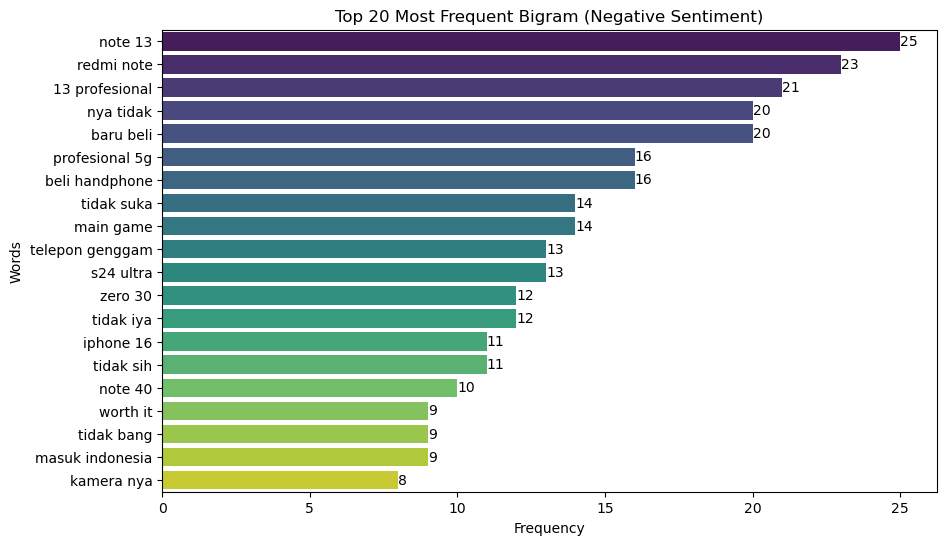

In [47]:
# Plot top 20 most frequent words for negative
top_words_negative_bi = word_freq_bi_negative.head(20)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_words_negative_bi.values, y=top_words_negative_bi.index, palette='viridis')

for index, value in enumerate(top_words_negative_bi.values):
    plt.text(value, index, str(value), va='center')

plt.title('Top 20 Most Frequent Bigram (Negative Sentiment)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


Kata-kata negatif berpasangan yang paling sering muncul:
- Note 13, Redmi note, S24 ultra: Model-model smartphone tertentu dari merek Redmi dan Samsung sering disebutkan dalam ulasan negatif. Ini menunjukkan bahwa meskipun model-model ini populer, namun masih ada pengguna yang tidak puas.
- Tidak suka, tidak sih: Kata ini secara langsung menunjukkan ketidakpuasan pengguna terhadap produk.
- Kamera nya: Ini menunjukkan bahwa kualitas kamera adalah salah satu keluhan utama pengguna.
- Profesional 5G: Kombinasi kata ini mungkin menunjukkan bahwa pengguna yang mengharapkan kinerja tinggi dari smartphone 5G merasa kecewa.

Insight yang didapat:
- Model-model smartphone tertentu memiliki lebih banyak ulasan negatif dibandingkan dengan model lainnya.
- Kualitas kamera masih menjadi salah satu keluhan utama pengguna.
- Pengguna memiliki ekspektasi yang tinggi terhadap smartphone, terutama untuk fitur-fitur seperti kinerja dan konektivitas.
- Fitur-fitur baru seperti 5G belum sepenuhnya memenuhi ekspektasi pengguna.

### vi.b.2. Wordcloud

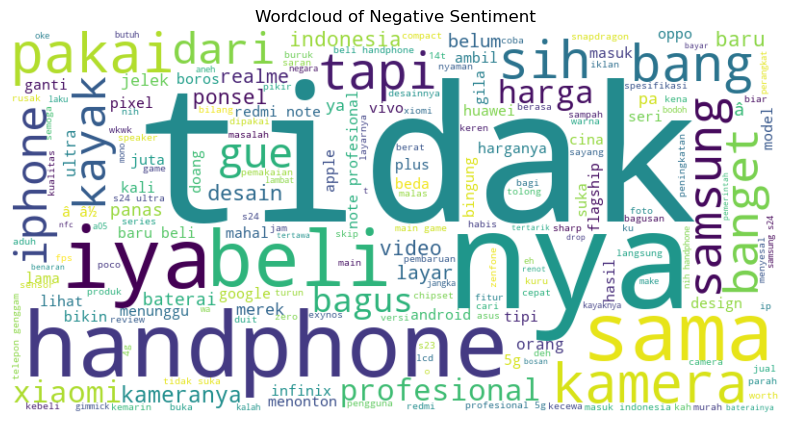

In [48]:
# Wordcloud of Negative Sentiment
wordcloud_neg = WordCloud(width=800, height=400, background_color="white").generate(' '.join(X_train_negative))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of Negative Sentiment")
plt.show()

Pengguna yang memberikan ulasan negatif cenderung mengeluhkan kualitas produk, terutama kualitas kamera dan layar. Mereka juga merasa kecewa dengan kinerja dan fitur-fitur tertentu dari smartphone yang mereka beli. Harga yang dianggap terlalu tinggi juga menjadi salah satu faktor yang membuat pengguna tidak puas. Merek-merek populer pun tidak luput dari kritik.

## vi.c. Neutral Comments

### vi.c.1. Word Frequency Analysis

In [49]:
# Filter X_train for neutral sentiment
X_train_neutral = X_train[y_train == 2]

# CountVectorizer for unigram
vectorizer = CountVectorizer(stop_words=stpwds_id, ngram_range=(1, 1))  # Unigrams

# Apply CountVectorizer to X_train neutral
X_neutral = vectorizer.fit_transform(X_train_neutral)
word_freq_uni_neutral = pd.DataFrame(X_neutral.toarray(), columns=vectorizer.get_feature_names_out())

# Compute word frequencies
word_freq_uni_neutral = word_freq_uni_neutral.sum(axis=0).sort_values(ascending=False)

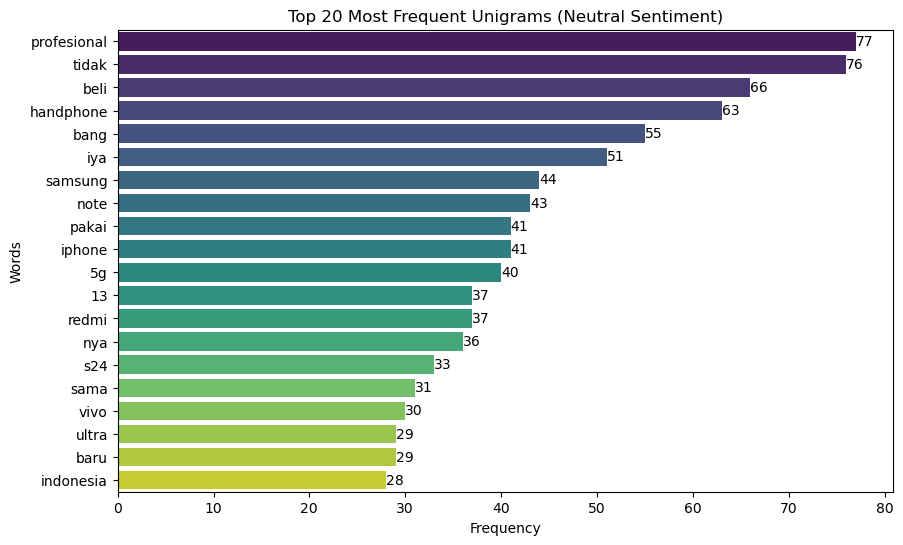

In [50]:
# Plot top 20 most frequent words for neutral
top_words_neutral = word_freq_uni_neutral.head(20)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_words_neutral.values, y=top_words_neutral.index, palette='viridis')

for index, value in enumerate(top_words_neutral.values):
    plt.text(value, index, str(value), va='center')

plt.title('Top 20 Most Frequent Unigrams (Neutral Sentiment)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

Kata-kata yang paling sering muncul dalam sentimen netral:
- Profesional, tidak, beli, handphone: Kata-kata ini menunjukkan bahwa ulasan tersebut memang terkait dengan produk smartphone, namun tidak memberikan penilaian yang sangat positif atau negatif.
- Bang, iya, sama: Kata-kata ini sering digunakan sebagai pengisi kalimat dan tidak memberikan banyak informasi tentang perasaan pengguna.
- Samsung, note, iphone, redmi: Ini menunjukkan bahwa merek-merek ini sering disebut dalam ulasan netral dan merupakan pilihan yang cukup populer di kalangan konsumen.
- 5G, S24, ultra: Kata-kata ini menunjukkan bahwa fitur-fitur terbaru seperti teknologi 5G dan model smartphone terbaru juga menjadi topik pembicaraan dalam ulasan netral.

Insight yang didapat:
- Ulasan netral cenderung lebih fokus pada fakta dan informasi produk daripada pada emosi.
- Ulasan netral sering kali digunakan untuk membandingkan berbagai merek dan model smartphone.
- Ulasan netral sering kali mengandung informasi teknis tentang produk, seperti spesifikasi dan fitur.

In [51]:
# CountVectorizer for bigram
vectorizer_bi = CountVectorizer(stop_words=stpwds_id, ngram_range=(2, 2))  # Bigrams

# Apply CountVectorizer to X_train neutral
X_neutral_bi = vectorizer_bi.fit_transform(X_train_neutral)
bigram_freq_neutral = pd.DataFrame(X_neutral_bi.toarray(), columns=vectorizer_bi.get_feature_names_out())

# Compute word frequencies
word_freq_bi_neutral = bigram_freq_neutral.sum(axis=0).sort_values(ascending=False)

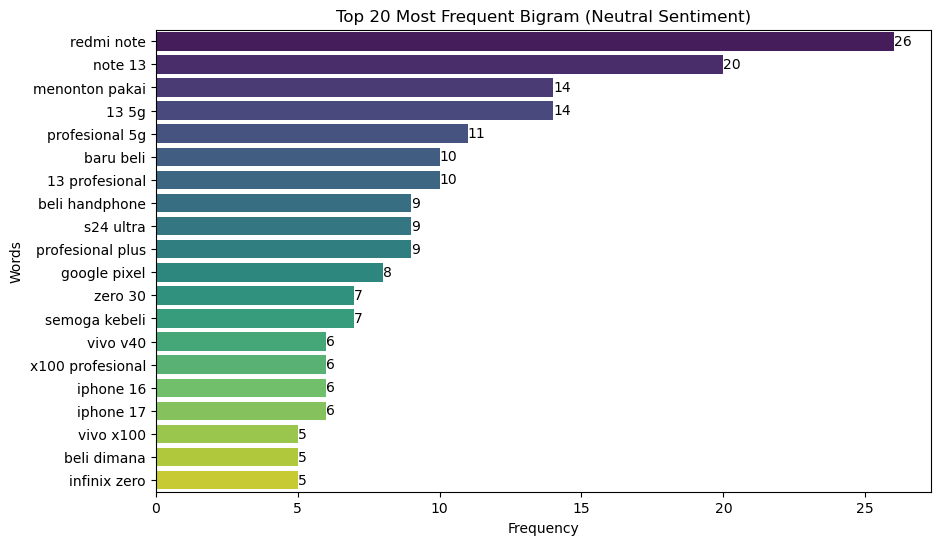

In [52]:
# Plot top 20 most frequent words for neutral
top_words_neutral_bi = word_freq_bi_neutral.head(20)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_words_neutral_bi.values, y=top_words_neutral_bi.index, palette='viridis')

for index, value in enumerate(top_words_neutral_bi.values):
    plt.text(value, index, str(value), va='center')

plt.title('Top 20 Most Frequent Bigram (Neutral Sentiment)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


Kata-kata netral berpasangan yang paling sering muncul:
- Redmi note, note 13: Model-model smartphone tertentu dari merek Redmi sering disebutkan dalam ulasan netral. Ini menunjukkan bahwa model-model ini cukup populer dan sering dibicarakan, namun tidak ada penilaian yang sangat positif atau negatif.
- Menonton pakai: Kombinasi kata ini menunjukkan bahwa pengguna sering menyebutkan smartphone mereka untuk menonton video atau konten.
- Profesional 5G, 13 5G: Kombinasi kata ini menunjukkan bahwa pengguna tertarik dengan fitur 5G dan sering membandingkan berbagai model smartphone yang memiliki fitur tersebut.
- Baru beli, beli handphone: Kombinasi kata ini menunjukkan bahwa banyak pengguna baru saja membeli smartphone dan sedang membicarakan pengalaman awal mereka.
- S24 ultra, google pixel, vivo x40: Merek dan model smartphone lain juga disebutkan, menunjukkan bahwa ulasan tidak hanya terfokus pada satu merek tertentu.

Insight yang didapat:
- Pengguna sering kali menyebutkan fitur-fitur tertentu dari smartphone, seperti 5G atau kemampuan untuk menonton video.
- Ulasan netral sering kali digunakan untuk membandingkan berbagai merek dan model smartphone.
- Banyak pengguna yang baru saja membeli smartphone dan membagikan pengalaman awal mereka.

### vi.c.2. Wordcloud

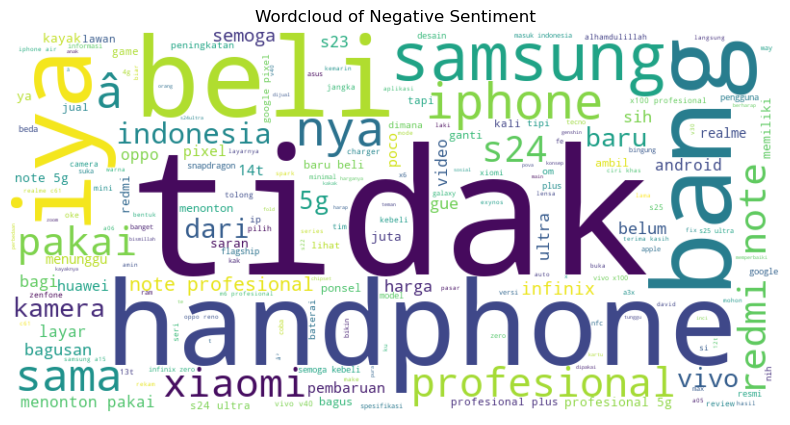

In [ ]:
# Wordcloud
wordcloud_neu = WordCloud(width=800, height=400, background_color="white").generate(' '.join(X_train_neutral))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of Neutral Sentiment")
plt.show()

Ulasan dengan sentimen netral ini cenderung lebih fokus pada fakta dan informasi tentang smartphone daripada pada emosi. Pengguna yang memberikan ulasan ini mungkin sedang mencari informasi lebih lanjut tentang produk, membandingkan beberapa merek, atau hanya berbagi pengalaman mereka tanpa memberikan penilaian yang sangat positif atau negatif.

---

# viii. Base Model

## Model Definition

In [54]:
tf.keras.backend.clear_session()

seed = 20
model = tf.keras.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(X_train_vec.shape[1],)))


model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model.add(tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model.add(tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model.add(tf.keras.layers.Dense(units=32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))

model.add(tf.keras.layers.Dense(units=3, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1091840   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 1,135,171
Trainable params: 1,135,171
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [55]:
print("X_train_vec shape:", X_train_vec.shape)
print("y_train shape:", y_train.shape)
print("X_val_vec shape:", X_val_vec.shape)
print("y_val shape:", y_val.shape)

X_train_vec shape: (2524, 4264)
y_train shape: (2524,)
X_val_vec shape: (281, 4264)
y_val shape: (281,)


In [56]:
history = model.fit(
    X_train_vec, y_train,
    epochs=30,
    batch_size=10,
    validation_data=(X_val_vec, y_val),
    verbose=1
)

Epoch 1/30
253/253 [==============================] - 4s 3ms/step - loss: 0.9685 - accuracy: 0.5309 - val_loss: 0.9366 - val_accuracy: 0.5694
Epoch 2/30
253/253 [==============================] - 1s 2ms/step - loss: 0.5193 - accuracy: 0.8027 - val_loss: 1.1660 - val_accuracy: 0.5694
Epoch 3/30
253/253 [==============================] - 1s 2ms/step - loss: 0.1931 - accuracy: 0.9259 - val_loss: 1.4553 - val_accuracy: 0.5658
Epoch 4/30
253/253 [==============================] - 1s 2ms/step - loss: 0.0865 - accuracy: 0.9695 - val_loss: 1.9475 - val_accuracy: 0.5480
Epoch 5/30
253/253 [==============================] - 1s 2ms/step - loss: 0.0570 - accuracy: 0.9814 - val_loss: 1.9872 - val_accuracy: 0.5409
Epoch 6/30
253/253 [==============================] - 1s 2ms/step - loss: 0.0432 - accuracy: 0.9853 - val_loss: 2.3046 - val_accuracy: 0.5445
Epoch 7/30
253/253 [==============================] - 1s 2ms/step - loss: 0.0348 - accuracy: 0.9861 - val_loss: 2.6514 - val_accuracy: 0.5445
Epoch 

## Model Evaluation

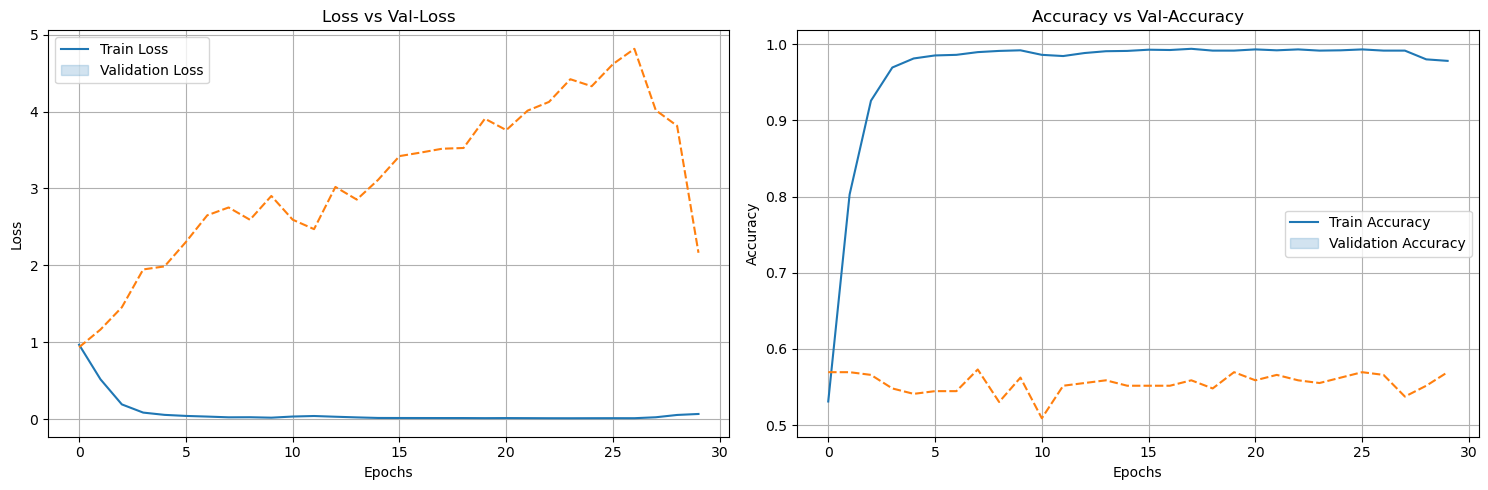

In [57]:
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))

# Plot Loss
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Val-Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid()

# Plot Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Val-Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.grid()

plt.tight_layout()
plt.show()

ANN Training (Base)


,precision,recall,f1-score,support
0,0.604790,0.765152,0.675585,132.0
1,0.576271,0.400000,0.472222,85.0
2,0.454545,0.390625,0.420168,64.0
macro avg,0.545202,0.518592,0.522659,281.0
weighted avg,0.561944,0.569395,0.555896,281.0
accuracy,0.569395,NaN,NaN,NaN


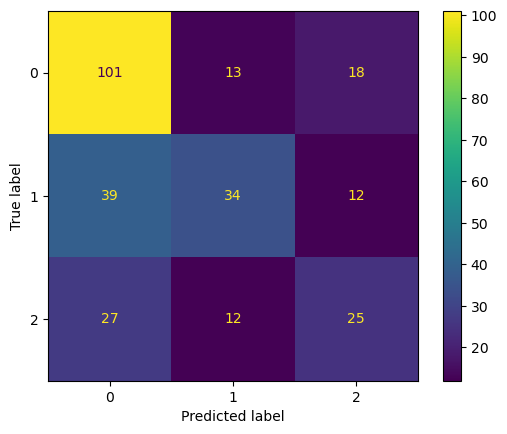

In [58]:
#making predictions
val_predictions = model.predict(X_val_vec)
val_predictions_classes = np.argmax(val_predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_val, val_predictions_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Classification Report as DataFrame
report_dict = classification_report(y_val, val_predictions_classes, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Add Validation Accuracy to the DataFrame
accuracy = accuracy_score(y_val, val_predictions_classes)
report_df = report_df.drop('accuracy', axis=0)
report_df.loc['accuracy'] = [accuracy, None, None, None]

# Display the report DataFrame
print("ANN Training (Base)")
display(report_df)

# ix. Model Improvement

## Model Definition

In [59]:
# For Dense Layers
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_val_vec = vectorizer.transform(X_val).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

# For LSTM Layers (Tokenization and Padding)
tokenizer = Tokenizer(num_words=7000)
tokenizer.fit_on_texts(X_train)
X_train_tokenized = tokenizer.texts_to_sequences(X_train)
X_val_tokenized = tokenizer.texts_to_sequences(X_val)
X_test_tokenized = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100  
X_train_padded = pad_sequences(X_train_tokenized, maxlen=max_sequence_length, padding='post')
X_val_padded = pad_sequences(X_val_tokenized, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_tokenized, maxlen=max_sequence_length, padding='post')

smote = SMOTE(sampling_strategy='auto', random_state=20)
X_train_vec_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)
X_train_padded_resampled, y_train_resampled = smote.fit_resample(X_train_padded, y_train)

# 3D Reshaping for Vectorized Data (if needed for Dense + LSTM hybrids)
X_train_reshaped = X_train_vec_resampled.reshape((X_train_vec_resampled.shape[0], 1, X_train_vec_resampled.shape[1]))
X_val_reshaped = X_val_vec.reshape((X_val_vec.shape[0], 1, X_val_vec.shape[1]))
X_test_reshaped = X_test_vec.reshape((X_test_vec.shape[0], 1, X_test_vec.shape[1]))


In [60]:
# Load FastText embeddings
model_path = 'cc.id.300.bin/cc.id.300.bin'
fasttext_model = gensim.models.fasttext.load_facebook_vectors(model_path)

# Create an embedding matrix
vocab_size = len(tokenizer.word_index) + 1 
embedding_dim = 300  
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, index in tokenizer.word_index.items():
    if word in fasttext_model.key_to_index: 
        embedding_matrix[index] = fasttext_model[word]


In [128]:

tf.keras.backend.clear_session()


seed = 20
tf.random.set_seed(seed)


model_lstm = tf.keras.Sequential()


model_lstm.add(tf.keras.layers.Embedding(
    input_dim=min(len(tokenizer.word_index) + 1, 7001),
    output_dim=embedding_dim,               
    weights=[embedding_matrix],            
    input_length=max_sequence_length,    
    trainable=False                 
))

#Input layer
model_lstm.add(tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(128, return_sequences=False, kernel_regularizer=tf.keras.regularizers.L2(0.001))
))
model_lstm.add(tf.keras.layers.Dropout(0.5))

#Hidden layers
# model_lstm.add(tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)))
# model_lstm.add(tf.keras.layers.Dropout(0.3))
# model_lstm.add(tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)))
# model_lstm.add(tf.keras.layers.Dropout(0.5))
# model_lstm.add(tf.keras.layers.Dense(units=16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)))

#Output Layers
model_lstm.add(tf.keras.layers.Dense(units=3, activation='softmax', kernel_regularizer=tf.keras.regularizers.L2(0.001)))


model_lstm.build(input_shape=(None, max_sequence_length))


model_lstm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',                
    metrics=['accuracy']
)


model_lstm.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 300)          1289100   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               439296    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 771       
Total params: 1,729,167
Trainable params: 440,067
Non-trainable params: 1,289,100
_________________________________________________________________


## Model Training

In [129]:
#Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3,  # Stop after 5 epochs without improvement
    restore_best_weights=True
)

results_file = "training_results.csv"
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5,  
    patience=5,  
    min_lr=1e-5  
)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) 

batch_size = 10  # Define batch size

history_lstm = model_lstm.fit(
    X_train_padded,
    y_train,
    validation_data=(X_val_padded, y_val),
    batch_size=batch_size,
    epochs=30,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/30
253/253 [==============================] - 8s 19ms/step - loss: 1.5951 - accuracy: 0.4628 - val_loss: 1.3936 - val_accuracy: 0.4698
Epoch 2/30
253/253 [==============================] - 4s 16ms/step - loss: 1.2931 - accuracy: 0.4691 - val_loss: 1.1953 - val_accuracy: 0.4662
Epoch 3/30
253/253 [==============================] - 5s 22ms/step - loss: 1.1593 - accuracy: 0.4715 - val_loss: 1.1066 - val_accuracy: 0.4982
Epoch 4/30
253/253 [==============================] - 7s 26ms/step - loss: 1.0986 - accuracy: 0.4774 - val_loss: 1.0613 - val_accuracy: 0.4982
Epoch 5/30
253/253 [==============================] - 7s 26ms/step - loss: 1.0671 - accuracy: 0.4786 - val_loss: 1.0292 - val_accuracy: 0.5125
Epoch 6/30
253/253 [==============================] - 7s 26ms/step - loss: 1.0454 - accuracy: 0.4842 - val_loss: 1.0101 - val_accuracy: 0.5302
Epoch 7/30
253/253 [==============================] - 7s 26ms/step - loss: 1.0263 - accuracy: 0.4960 - val_loss: 0.9972 - val_accuracy: 0.5302

## Model Evaluation

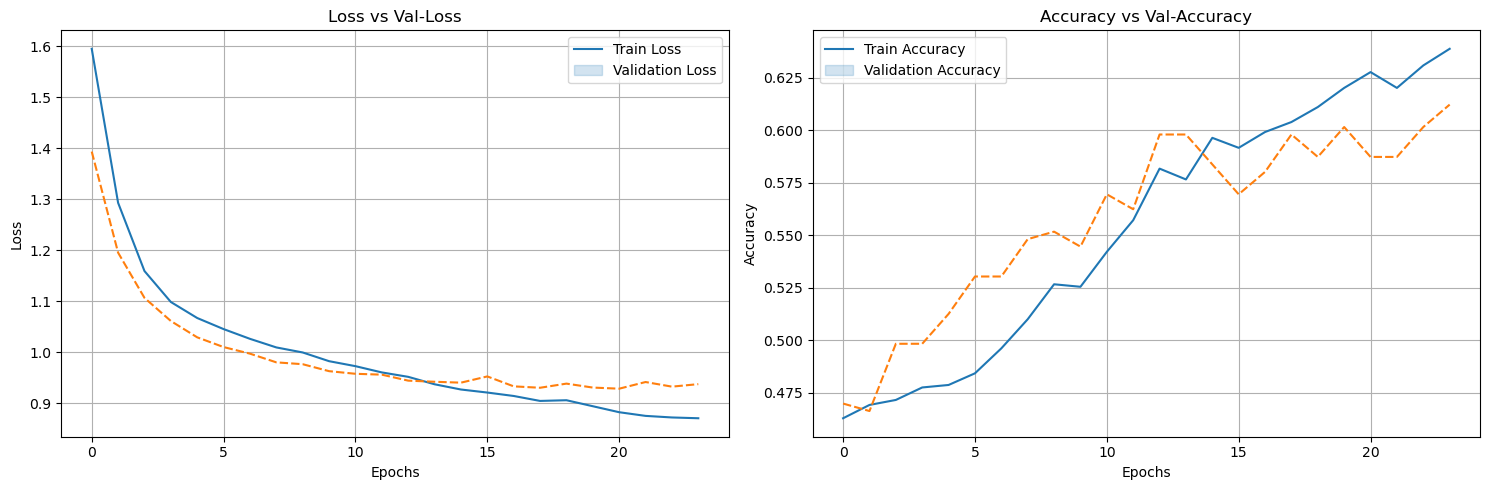

In [130]:
history_improved_df = pd.DataFrame(history_lstm.history)

plt.figure(figsize=(15, 5))

# Plot Loss
plt.subplot(1, 2, 1)
sns.lineplot(data=history_improved_df[['loss', 'val_loss']])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Val-Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid()

# Plot Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(data=history_improved_df[['accuracy', 'val_accuracy']])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Val-Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.grid()

plt.tight_layout()
plt.show()

ANN Training (LSTM)


,precision,recall,f1-score,support
0,0.469751,1.000000,0.639225,132.0
1,0.000000,0.000000,0.000000,85.0
2,0.000000,0.000000,0.000000,64.0
macro avg,0.156584,0.333333,0.213075,281.0
weighted avg,0.220666,0.469751,0.300277,281.0
accuracy,0.469751,NaN,NaN,NaN


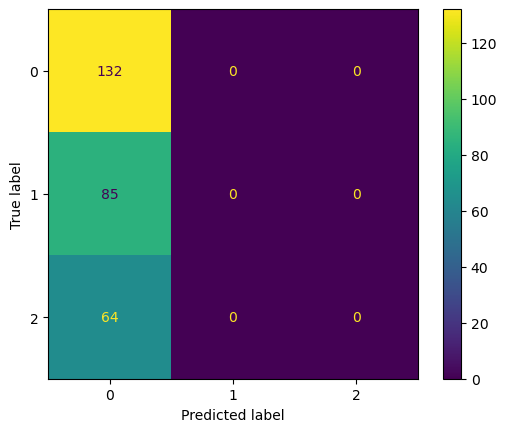

In [131]:
# Reshape the validation data to match the expected input shape
X_val_corrected = np.squeeze(X_val_reshaped)  

# Make predictions
val_predictions = model_lstm.predict(X_val_corrected)

# Convert probabilities to class labels
val_predictions_classes = np.argmax(val_predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_val, val_predictions_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Classification Report as DataFrame
report_improved_dict = classification_report(y_val, val_predictions_classes, output_dict=True)
report_improved_df = pd.DataFrame(report_improved_dict).transpose()

# Add Validation Accuracy to the DataFrame
accuracy = accuracy_score(y_val, val_predictions_classes)
report_improved_df = report_improved_df.drop('accuracy', axis=0)
report_improved_df.loc['accuracy'] = [accuracy, None, None, None]

# Display the report DataFrame
print("ANN Training (LSTM)")
display(report_improved_df)


-------------------

# x. Model Saving

In [135]:
#save into file
model_lstm.save('model_lstm.h5')

# with open('model_scaler.pkl', 'wb') as file_2:
#     pickle.dump (scaler, file_2)
# with open('model_encoder.pkl', 'wb') as file_3:
#     pickle.dump (encoder, file_3)
# with open('num_col.txt', 'w') as file_4:
#     json.dump (num_col, file_4)
# with open('cat_col.txt', 'w') as file_5:
#     json.dump (cat_col, file_5)
# with open('area_mapping.json', 'w') as file_6:
#     json.dump(area_freq, file_6) 

-------------------

# xi. Model Inference

-------------------

# xi. Kesimpulan

Aplikasi *Sentiment Analysis Application for Smartphone* yang kami namai dengan phonALytics berhasil memberikan solusi yang inovatif untuk membantu masyarakat dalam memilih smartphone berdasarkan opini dan sentimen netizen di YouTube. Dengan memanfaatkan teknik NLP berbasis Machine Learning atau Deep Learning, aplikasi ini mampu menganalisis sentimen komentar dan menampilkan hasil berupa klasifikasi sentimen (positif, negatif, netral) serta visualisasi word cloud yang mempermudah pemahaman pengguna terhadap opini publik.  

Dengan rekomendasi berbasis data yang informatif, pengguna dapat membuat keputusan pembelian smartphone yang lebih tepat sasaran dan sesuai dengan kebutuhan. Selain itu, proses yang efisien dalam pengumpulan, analisis, dan penyajian data menjadikan aplikasi ini relevan untuk berbagai jenis pengguna, mulai dari individu hingga pelaku bisnis di industri smartphone.  

**Business Impact**  
1. **Pengambilan Keputusan Konsumen**  
   Aplikasi ini memberikan dampak langsung kepada konsumen dengan mempermudah mereka memahami opini publik terhadap smartphone tertentu. Dengan informasi ini, konsumen dapat memilih produk yang paling sesuai dengan kebutuhan dan preferensi mereka, mengurangi kemungkinan pembelian yang tidak memuaskan.  

2. **Identifikasi Tren Pasar**  
    Aplikasi ini dapat membantu mengidentifikasi tren yang sedang muncul dan perubahan dalam preferensi konsumen, sehingga bisnis dapat tetap unggul di lingkungan pasar yang dinamis.

3. **Pengembangan Industri Smartphone**  
   Analisis sentimen yang dihasilkan dapat menjadi acuan bagi produsen untuk memahami tren pasar dan preferensi konsumen. Dengan insight yang diperoleh, produsen dapat merancang produk yang lebih sesuai dengan kebutuhan pasar, meningkatkan daya saing di industri yang semakin kompetitif.  

Dengan pendekatan berbasis data yang efektif dan relevan, aplikasi ini tidak hanya memberikan manfaat langsung bagi pengguna individu, tetapi juga memiliki potensi besar untuk mendukung keputusan strategis dalam industri teknologi.      

**Rekomendasi langkah selanjutnya**

Dalam model yang kami bangun, masih terdapat hal-hal yang perlu kami perbaiki diantaranya :
1. **Perbaikan Dataset**  
    Pemberian label pada dataset ini dilakukan secara manual oleh 4 anggota project, sehingga, meskipun telah ditentukan scope dalam pemberian label, adanya kesalahan ataupun perbedaan presepsi sangatlah mungkin terjadi. Maka dari itu, langkah yang akan kami ambil selanjutnya adalah memperbaiki dataset sehingga menjadi lebih memiliki makna seragam di setiap kategori sentimen sehingga memudahkan mesin untuk mempelajari dataset tersebut.
    
2. **Improvisasi Arsitektur Model**  
    Dalam deep learning, salah satu yang harus kita lakukan dalam membangun model ialah *trial and error*. Meskipun dalam membangun model ini kami telah melakukan percobaan terhadap berbagai arsitektur, namun kami masih belum mendapatkan model yang memiliki akurasi memuaskan dengan threshold 80%. Maka dari itu, kami juga berencana untuk melakukan improvisasi dan percobaan untuk berbagai arsitektur model lainnya.

-------------------